# **Analyse in Pandas en PowerBI**
Groep 8

***Airport iata codes*** <br>
**FR** = Ryanair <br>
**SN** = Brussels Airlines <br>
**HV** = Transavia <br>
**TB** = Tui

In [1]:
import os
import csv
import sys
import warnings
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector as sql
from dotenv import load_dotenv

from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR

warnings.filterwarnings('ignore')

dotenv_path = "../.env"
load_dotenv(dotenv_path)

True

## Data

### CSV (overbodig)

In [2]:
# folder = 'C:\\ProgramData\\MySQL\\MySQL Server 8.0\\Uploads\\'
# files = os.listdir(folder)

In [3]:
# # create new dataframe
# allData = pd.DataFrame()

# # loop through files and append to dataframe
# for i, file in enumerate(files):
#     filepath = os.path.join(folder, file)
#     df = pd.read_csv(filepath)
#     allData = allData.append(df, ignore_index=True)

# # save to csv
# allData.to_csv('../analyse/allData.csv', index=False)

### Datawarehouse MySQL Workbench

In [2]:
# make a connection to the database
dwh = sql.connect(
    host="127.0.0.1",   # ip-adres
    port=3306,   # poortnummer
    user=os.getenv("USER"),   # username
    password=os.getenv("PASSWORD"),   # wachtwoord
    database="AirFaresDWH"   # naam van de datawarehouse in mysql workbench
    # database="groep8dep"   # naam van de OLTP database in mysql workbench
)

# check if the connection succeeded
print(dwh)

In [3]:
# create cursor
cursor = dwh.cursor()

# use the right database
cursor.execute("USE AirFaresDWH")

# get the column names
cursor.execute("SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'dimairline'")
columns_airline = cursor.fetchall()

cursor.execute("SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'dimairport'")
columns_airport = cursor.fetchall()

cursor.execute("SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'dimdate'")
columns_date = cursor.fetchall()

cursor.execute("SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'dimflight'")
columns_flight = cursor.fetchall()

cursor.execute("SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'factflightfare'")
columns_fact = cursor.fetchall()


# get all the data
cursor.execute("SELECT * FROM dimairline")
rows_airline = cursor.fetchall()

cursor.execute("SELECT * FROM dimairport")
rows_airport = cursor.fetchall()

cursor.execute("SELECT * FROM dimdate")
rows_date = cursor.fetchall()

cursor.execute("SELECT * FROM dimflight")
rows_flight = cursor.fetchall()

cursor.execute("SELECT * FROM factflightfare")
rows_fact = cursor.fetchall()


# remove the first line with null values
rows_airline = rows_airline[1:]
rows_airport = rows_airport[1:]
rows_date = rows_date[1:]
rows_flight = rows_flight[1:]
rows_fact = rows_fact[1:]

# create dataframes
df_airline = pd.DataFrame(rows_airline, columns=[i[0] for i in columns_airline])
df_airport = pd.DataFrame(rows_airport, columns=[i[0] for i in columns_airport])
df_date = pd.DataFrame(rows_date, columns=[i[0] for i in columns_date])
df_flight = pd.DataFrame(rows_flight, columns=[i[0] for i in columns_flight])
df_fact = pd.DataFrame(rows_fact, columns=[i[0] for i in columns_fact])

# create a new dataframe with all the data
# df = pd.merge(df_fact, df_flight, on='flight_key')
# df = pd.merge(df, df_airline, on='airline_key')
# df = pd.merge(df, df_airport, left_on='depatureAirportKey', right_on='airport_key')
# df = pd.merge(df, df_airport, left_on='arrivalAirportKey', right_on='airport_key', how='inner')
# df = pd.merge(df, df_date, left_on='scrapeDateKey', right_on='date_key')
# df = pd.merge(df, df_date, left_on='departureDateKey', right_on='date_key')
# df = pd.merge(df, df_date, left_on='arrivalDateKey', right_on='date_key')

# create the query to connect the tables
query = """
SELECT * FROM factflightfare
INNER JOIN dimflight ON factflightfare.flight_key = dimflight.flight_key
INNER JOIN dimairline ON factflightfare.airline_key = dimairline.airline_key
INNER JOIN dimairport AS dep_airport ON factflightfare.depatureAirportKey = dep_airport.airport_key
INNER JOIN dimairport AS arr_airport ON factflightfare.arrivalAirportKey = arr_airport.airport_key
INNER JOIN dimdate AS scrape_date ON factflightfare.scrapeDateKey = scrape_date.date_key
INNER JOIN dimdate AS dep_date ON factflightfare.departureDateKey = dep_date.date_key
INNER JOIN dimdate AS arr_date ON factflightfare.arrivalDateKey = arr_date.date_key
"""

# create the dataframe
df = pd.read_sql(query, dwh)

# show the columns of the df
print(df.columns)

# show the df
df

Index(['flightfare_key', 'flight_key', 'airline_key', 'depatureAirportKey',
       'arrivalAirportKey', 'scrapeDateKey', 'departureDateKey',
       'arrivalDateKey', 'availableSeats', 'price', 'flight_key', 'flight_id',
       'flightnumber', 'numberOfStops', 'departureTime', 'arrivalTime',
       'duration', 'start_date', 'end_date', 'airline_key',
       'airline_iata_code', 'airline_name', 'country', 'airport_key',
       'airport_iata_code', 'airport_name', 'location', 'country',
       'airport_key', 'airport_iata_code', 'airport_name', 'location',
       'country', 'date_key', 'date', 'day_of_week', 'day_of_month',
       'day_of_year', 'year', 'dayName', 'monthName', 'nameOfQuarter',
       'numberOfQuarter', 'isWeekend', 'isWeekDay', 'isHoliday', 'date_key',
       'date', 'day_of_week', 'day_of_month', 'day_of_year', 'year', 'dayName',
       'monthName', 'nameOfQuarter', 'numberOfQuarter', 'isWeekend',
       'isWeekDay', 'isHoliday', 'date_key', 'date', 'day_of_week',
      

,flightfare_key,flight_key,airline_key,depatureAirportKey,arrivalAirportKey,scrapeDateKey,departureDateKey,arrivalDateKey,availableSeats,price,...,day_of_month,day_of_year,year,dayName,monthName,nameOfQuarter,numberOfQuarter,isWeekend,isWeekDay,isHoliday
0,1,641,1,7,4,20230420,20230522,20230522,-1,21.99,...,22,142,2023,Monday,May,Q2,2,0,1,0
1,2,13,1,5,1,20230420,20230521,20230521,3,90.73,...,21,141,2023,Sunday,May,Q2,2,1,0,0
2,3,171,1,7,1,20230420,20230521,20230521,2,83.79,...,21,141,2023,Sunday,May,Q2,2,1,0,0
3,4,1114,1,7,10,20230420,20230521,20230521,-1,93.36,...,21,141,2023,Sunday,May,Q2,2,1,0,0
4,5,375,1,7,2,20230420,20230521,20230521,4,132.94,...,21,141,2023,Sunday,May,Q2,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252716,259268,13690,4,13,17,20230426,20230712,20230712,-1,309.99,...,12,193,2023,Wednesday,July,Q3,3,0,1,1
252717,259269,13690,4,13,17,20230430,20230712,20230712,-1,319.99,...,12,193,2023,Wednesday,July,Q3,3,0,1,1
252718,259270,13690,4,13,17,20230423,20230712,20230712,-1,309.99,...,12,193,2023,Wednesday,July,Q3,3,0,1,1
252719,259271,13690,4,13,17,20230418,20230712,20230712,-1,309.99,...,12,193,2023,Wednesday,July,Q3,3,0,1,1


## Questions

### 1) Welke vliegtuigmaatschappij is gemiddeld de goedkoopste / de duurste?

Kan zowel in Python als in PowerBI

De goedkoopste vliegtuigmaatschappij is FR met een gemiddelde prijs van 114.36 euro.
De duurste vliegtuigmaatschappij is TB met een gemiddelde prijs van 201.22 euro.


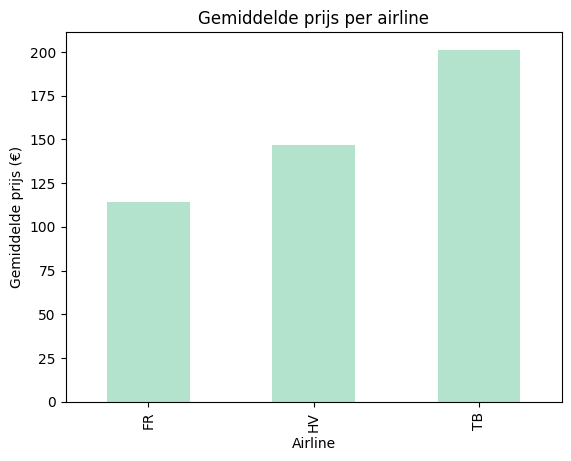

In [4]:
# read the data
data = df

# group the data by airline and calculate the average price
grouped_data = data.groupby(['airline_iata_code'])['price'].mean()
sorted_data = grouped_data.sort_values()

# print the results
print("De goedkoopste vliegtuigmaatschappij is " + sorted_data.index[0] + " met een gemiddelde prijs van", round(sorted_data[0], 2), "euro.")
print("De duurste vliegtuigmaatschappij is " + sorted_data.index[-1] + " met een gemiddelde prijs van", round(sorted_data[-1], 2), "euro.")

# plot the results
grouped_data.plot(kind='bar', colormap='Pastel2')
plt.title('Gemiddelde prijs per airline')
plt.xlabel('Airline')
plt.ylabel('Gemiddelde prijs (€)')
plt.show()

### 2) Hoe vaak vliegt elke vliegtuigmaatschappij per week naar elk van de bestemmingen?

Kan zowel in Python als in PowerBI

In [5]:
# read the data
data = df

# add new column for weekday
data['weekday'] = pd.to_datetime(data['departureDateKey']).dt.day_name()

# group the data by airline and destination + count the number of flights per week
grouped_data = data.groupby(['airline_iata_code', 'arrivalAirportKey', 'weekday']).size().reset_index(name='countOfFlights')

pivoted_data = pd.pivot_table(grouped_data, values='countOfFlights', index=['airline_iata_code'], columns=['arrivalAirportKey', 'weekday'], fill_value=0)

sorted_data = pivoted_data.sort_values(by=['airline_iata_code'])

pd.DataFrame(sorted_data)

for i in range(len(sorted_data)):
    print("De vliegtuigmaatschappij " + sorted_data.index[i] + " heeft", sorted_data.iloc[i].sum(), "in totaal.")

De vliegtuigmaatschappij FR heeft 92896 in totaal.
De vliegtuigmaatschappij HV heeft 25469 in totaal.
De vliegtuigmaatschappij TB heeft 134356 in totaal.


In [6]:
# read the data
data = df

# iterate over the data and add to array
dataArr = []
for i in range(len(data)):
    dataArr.append(data.iloc[i])

# create dictionary to hold count of flights per airline and destination
flights_count = {}

# iterate over flights and update count in dictionary
for flight in dataArr:
    airline = flight['airline_iata_code']
    destination = flight['arrivalAirportKey']
    if airline not in flights_count:
        flights_count[airline] = {}
    if destination not in flights_count[airline]:
        flights_count[airline][destination] = 0
    flights_count[airline][destination] += 1

# create list of airlines and destinations
airlines = list(flights_count.keys())
destinations = list(set(dest for dests in flights_count.values() for dest in dests.keys()))

# print table header
print('Airline'.ljust(15), end='')
for dest in destinations:
    # switch the dest to the correct airport name
    match dest:
        case 1:
            dest = 'Malaga'
        case 2:
            dest = 'Alicante'
        case 4:
            dest = 'Brindisi'
        case 6:
            dest = 'Corfu'
        case 8:
            dest = 'Faro'
        case 9:
            dest = 'Kreta'
        case 10:
            dest = 'Ibiza'
        case 12:
            dest = 'Napels'
        case 14:
            dest = 'Palma'
        case 15:
            dest = 'Palermo'
        case 16:
            dest = 'Rhodos'
        case 17:
            dest = 'Tenerife'
    print(str(dest).rjust(10), end='')
print('')

# print table body
for airline in airlines:
    print(airline.ljust(15), end='')
    for dest in destinations:
        count = flights_count.get(airline, {}).get(dest, 0)
        print(str(count).rjust(10), end='')
    print('')

Airline            Malaga  Alicante  Brindisi     Corfu      Faro     Kreta     Ibiza    Napels     Palma   Palermo    Rhodos  Tenerife
FR                  15524     15011      5418      3811     12041      2335      4543     10384     10011      5743      3467      4608
TB                  25572     25756      2132      4559      2637     12912      9734      2232     16087      2232     10657     19846
HV                   3995      6698         0         0      5947      2768      4691         0         0         0         0      1370


In [7]:
# read the data
data = df

# open new csv file
with open('../analyse/vluchtenPerWeek.csv', 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['airline_iata_code', 'arrival_airport_iata_code', 'weekNr', 'countOfFlights'])

# iterate over the data and add to array
dataArr = []
for i in range(len(data)):
    dataArr.append(data.iloc[i])

# initialize dictionary to store flights per airline per destination per week
flights_per_week = {}

# loop through the rows
for row in dataArr:
    airline = row['airline_iata_code']
    destination = row['arrivalAirportKey']
    departure_date = row['departureDateKey']

    # convert departure date to datetime object
    departure_date_obj = datetime.datetime.strptime(str(departure_date), '%Y%m%d')

    # extract week number
    week_number = departure_date_obj.strftime('%W')

    # add info to flights_per_week dictionary
    if airline not in flights_per_week:
        flights_per_week[airline] = {}
    if destination not in flights_per_week[airline]:
        flights_per_week[airline][destination] = {}
    if week_number not in flights_per_week[airline][destination]:
        flights_per_week[airline][destination][week_number] = 0
    flights_per_week[airline][destination][week_number] += 1

with open('../analyse/vluchtenPerWeek.csv', 'a', newline='') as csv_file:
    # create csv writer
    writer = csv.writer(csv_file)

    # print flights per airline per destination per week
    for airline, destinations in flights_per_week.items():
        for destination, weeks in destinations.items():
            for week, num_flights in weeks.items():
                # print(f"Airline: {airline}, Destination: {destination}, Week: {week}, Flights: {num_flights}")
                writer.writerow([airline, destination, week, num_flights])

### 3) Welke vliegtuigmaatschappij biedt de snelste vlucht aan naar een bepaalde bestemming?   KYANA

Volgens mij in PowerBI

### 4) Welke vliegtuigmaatschappij biedt de goedkoopste vlucht aan naar een bepaalde bestemming?

Volgens mij in PowerBI

### 5) Welke vliegtuigmaatschappij biedt een vlucht aan zonder tussenstops, met maximum 1 tussentop, ... ?

Volgens mij in PowerBI

### 6) Rapport over prijsevolutie en beschibaarheidsevolutie doorheen de tijd?

Geen idee wat ze hiermee bedoelen

### 7) Is er een correlatie met de vakantiebestemmingen: zijn bepaalde bestemmingen significant duurder dan andere bestemmingen?

Kan in zowel python als PowerBI denk ik?

### 8) Zijn de prijzen gerelateerd aan vakantieperiodes hier of ter plaatse?

Volgens mij in PowerBI

### 9) Kan je de prijsstrategie afleiden? (Invloed van aantal dagen voor vertrek, invloed van beschikbaarheid)

Weet ik niet in Python of PowerBI

### 10) Is er een link tussen prijs en afstand (en duration)? Bijvoorbeeld Tenerife is anderhalf uur verder dan Alicante.

Geen idee wat er hier moet gebeuren dus ook geen idee van Python of PowerBI

### 11) Is er een link tussen prijs en land? Zijn sommige landen opvallend duurder (en kan dit niet verklaard worden door de extra afstand)

Geen idee wat er hier moet gebeuren dus ook geen idee van Python of PowerBI

### 12) Hoeveel dagen voor vertrek is een vlucht volgeboekt? Zijn er bestemmingen waarbij de vluchten bijna volgeboekt zijn?

Kan in zowel Pyhton als PowerBI volgens mij

### 13) Hoeveel procent van de vluchten zijn volgeboekt? / Hoeveel plaatsen zijn er nog vrij 5 dagen voor vertrek?   KYANA

In Python volgens mij

#### Testers

In [ ]:
# Hoeveel procent van de vluchten zijn volgeboekt? / Hoeveel plaatsen zijn er nog vrij 5 dagen voor vertrek.

# read the data
data = df

# iterate over the data and add to array
dataArr = []
for i in range(len(data)):
    dataArr.append(data.iloc[i])

# create dictionary to hold count of available seats per flight for the last 5 days before departure
available_seats = {}

# iterate over flights and update count in dictionary
for flight in dataArr:
    airline = flight['airline_iata_code']
    destination = flight['arrivalAirportKey']
    departure_date = flight['departureDateKey']
    available_seats = flight['availableSeats']

    # convert departure date to datetime object
    departure_date_obj = datetime.datetime.strptime(str(departure_date), '%Y%m%d')

    # get the 5 days before departuredate
    five_days_before_departure = departure_date_obj - datetime.timedelta(days=5)

    # add info to available_seats dictionary
    if airline not in available_seats:
        available_seats[airline] = {}
    if destination not in available_seats[airline]:
        available_seats[airline][destination] = {}
    if five_days_before_departure not in available_seats[airline][destination]:
        available_seats[airline][destination][five_days_before_departure] = 0
    available_seats[airline][destination][five_days_before_departure] += 1

# create list of airlines and destinations
airlines = list(available_seats.keys())
destinations = list(set(dest for dests in available_seats.values() for dest in dests.keys()))

# print table header
print('Airline'.ljust(15), end='')
for dest in destinations

In [19]:
# hoeveel procent van alle vluchten zijn volgeboekt
# hoeveel plaatsen zijn er nog vrij 5 dagen voor vertrek

# read the data
data = df

# iterate over the data and add to array
dataArr = []
for i in range(len(data)):
    dataArr.append(data.iloc[i])

# get the available seats for each flight
available_seats = {}
for flight in dataArr:
    airline = flight['airline_iata_code']
    destination = flight['arrivalAirportKey']
    departure_date = flight['departureDateKey']
    available_seats = flight['availableSeats']

    # convert departure date to datetime object
    departure_date_obj = datetime.datetime.strptime(str(departure_date), '%Y%m%d')

    # get the 5 days before departuredate
    five_days_before_departure = departure_date_obj - datetime.timedelta(days=5)


TypeError: argument of type 'numpy.int64' is not iterable

In [49]:
# read the data
data = df.head(50)

# iterate over the data and add to array
dataArr = []
for i in range(len(data)):
    dataArr.append(data.iloc[i])

# get the available seats for each flight
available_seats_dict = []
for flight in dataArr:
    flightkey = flight['flightfare_key']
    available_seats = flight['availableSeats']

    # add the flightkey and available seats to the array
    available_seats_dict.append({flightkey, available_seats})

# get the number of bookings for each flight
print(available_seats_dict)

[{1, -1}, {2, 3}, {2, 3}, {4, -1}, {4, 5}, {6, -1}, {-1, 7}, {8, 2}, {9, 1}, {10, -1}, {11, -1}, {12, -1}, {13, -1}, {14, -1}, {1, 15}, {16, -1}, {17, 5}, {18, -1}, {1, 19}, {2, 20}, {5, 21}, {22, -1}, {2, 23}, {24, -1}, {25, 5}, {26, 4}, {27, 5}, {28, -1}, {1, 29}, {5, 30}, {-1, 31}, {32, 5}, {33, 2}, {34, 5}, {2, 35}, {36, 4}, {4, 37}, {1, 38}, {2, 39}, {40, -1}, {41, 4}, {42, 4}, {2, 43}, {1, 44}, {1, 45}, {46, -1}, {5, 47}, {48, 2}, {49, -1}, {50, 3}]


In [48]:
from datetime import timedelta, date


data = df.head(150)

# iterate over the data and add to array
dataArr = []
for i in range(len(data)):
    dataArr.append(data.iloc[i])

data['beschikbare_plaatsen'] = data['availableSeats']

startdatum = datetime.date.fromisoformat('20230425')

datums = [startdatum + timedelta(days=x) for x in range(1, 6)]

def calculateFull(data, datums):
    results = []
    for datum in datums:
        departure_date = datetime.datetime.strptime(str(datum), '%Y-%m-%d')
        five_days_before_departure = departure_date - datetime.timedelta(days=5)
        subset = data[(data['departureDateKey'] == five_days_before_departure)]
        beschikbare_plaatsen = subset['beschikbare_plaatsen'].sum()
        totaal_plaatsen = subset['availableSeats'].sum()
        percentage = (beschikbare_plaatsen / totaal_plaatsen) * 100
        results.append(percentage)
    return pd.DataFrame(results)

print(calculateFull(dataArr, datums))


TypeError: list indices must be integers or slices, not str

#### Hoeveel procent van de vluchten zijn volgeboekt?

In [50]:
# read the data
data = df

# iterate over the data and add to array
dataArr = []
for i in range(len(data)):
    dataArr.append(data.iloc[i])

# get the total amount of flights
total_flights = len(dataArr)

# get the total amount of flights that are full
full_flights = 0
for flight in dataArr:
    if flight['availableSeats'] == 0:
        full_flights += 1

# calculate the percentage of full flights
percentage_full_flights = (full_flights / total_flights) * 100

# print the percentage of full flights
print(f"{round(percentage_full_flights, 2)} % of all flights are full.")

0.0 % of all flights are full


#### Hoeveel plaatsen zijn er nog vrij 5 dagen voor vertrek?

In [13]:
# read the data
# add the rows from df with the departure dates '20230423', '20230422', '20230421', '20230420', '20230419' and '20230418' to the new dataframe
data = df[df['departureDateKey'].isin([20230423, 20230422, 20230421, 20230420, 20230419, 20230418])]


# iterate over the data and add to array
dataArr = []
for i in range(len(data)):
    dataArr.append(data.iloc[i])

# write a function to get the available seats for a given departure date
def get_available_seats(data, departure_date):
    # convert departure date to datetime object
    departure_date_obj = datetime.datetime.strptime(str(departure_date), '%Y%m%d')

    # get the 5 days before departuredate
    five_days_before_departure = departure_date_obj - datetime.timedelta(days=5)

    # get the subset of flights for the given departure date
    subset = data[(data['departureDateKey'] == five_days_before_departure)]

    # if the available seats for the flight is equal to -1, skip the flight
    # if subset['availableSeats'] == -1:
    #     return -1

    # get the total amount of available seats for the given departure date
    available_seats = subset['availableSeats'].sum()

    # return the total amount of available seats
    return available_seats

# get the available seats for each flight with the function above
available_seats = []
for flight in dataArr:
    available_seats.append(get_available_seats(data, 20230423))

# add the available seats to the dataframe
data['available_seats'] = available_seats

# print the 'available_seats' column
print(data['available_seats'])

# write to csv
data['available_seats'].to_csv('data.csv', index=False)

230       0
231       0
232       0
233       0
234       0
         ..
252289    0
252290    0
252291    0
252292    0
252293    0
Name: available_seats, Length: 2127, dtype: int64


In [32]:
data = df

# write a function to get the available seats for a given departure date
def get_available_seats(data, departure_date, flightkey):
    # convert departure date to datetime object
    departure_date_obj = datetime.datetime.strptime(str(departure_date), '%Y%m%d')

    # get the 5 days before departuredate
    five_days_before_departure = str(departure_date_obj - datetime.timedelta(days=5))

    five_days_before_departure = datetime.datetime.strptime(five_days_before_departure, '%Y-%m-%d %H:%M:%S').strftime('%Y%m%d')

    # get the subset of flights for the given departure date
    subset = data[(data['departureDateKey'] == int(five_days_before_departure)) & (data['flightfare_key'] == flightkey)]

    # if the subset is empty, return -1
    if subset.empty:
        return -2

    # if the available seats for the flight is equal to -1, skip the flight
    if subset['availableSeats'].iloc[0] == -1:
        return -1

    # get the total amount of available seats for the given departure date
    available_seats = subset['availableSeats'].sum()
    

    # return the total amount of available seats (should be 1 line)
    return available_seats

# get the available seats for each flight with the function above
available_seats = []
for flight in data.itertuples():
    available_seats.append(get_available_seats(data, 20230422, flight.flightfare_key))

# available_seats = get_available_seats(data, 20230421)

# add the available seats to the dataframe
data['available_seats'] = available_seats

# if the available seats is -2, skip the flight
data = data[data['available_seats'] != -2]

# print the 'available_seats' column
print(data['available_seats'])

# write a switch function to match the arrival airport key to the airport name
def switch_arrival_airport_key(key):
    match key:
        case 1:
            key = 'Malaga'
        case 2:
            key = 'Alicante'
        case 4:
            key = 'Brindisi'
        case 6:
            key = 'Corfu'
        case 8:
            key = 'Faro'
        case 9:
            key = 'Kreta'
        case 10:
            key = 'Ibiza'
        case 12:
            key = 'Napels'
        case 14:
            key = 'Palma'
        case 15:
            key = 'Palermo'
        case 16:
            key = 'Rhodos'
        case 17:
            key = 'Tenerife'
    return key

# add the arrival airport name to the dataframe
data['arrivalAirportKey'] = data['arrivalAirportKey'].apply(switch_arrival_airport_key)

# write to csv
data[['flightfare_key', 'arrivalAirportKey', 'available_seats']].to_csv('data.csv', index=False)

10975     1
11138    -1
11518     4
25645    -1
25646     4
         ..
252279    5
252280   -1
252281   -1
252282   -1
252283   -1
Name: available_seats, Length: 171, dtype: int64


In [ ]:
with open('beforeDeparture.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(data['available_seats'])

### 14) Plot het verband tussen de prijs en het aantal dagen voor vertrek voor Ryanair voor de afgelopen maand. Maak gebruik van regressie om de prijzen te voorspellen voor de volgende maand.

Plotten kan in zowel PowerBI als in Python, regressie is sowieso in Python

#### Plot het verband tussen de prijs en het aantal dagen voor vertrek voor Ryanair voor de afgelopen maand.

Text(0, 0.5, 'Prijs (€)')

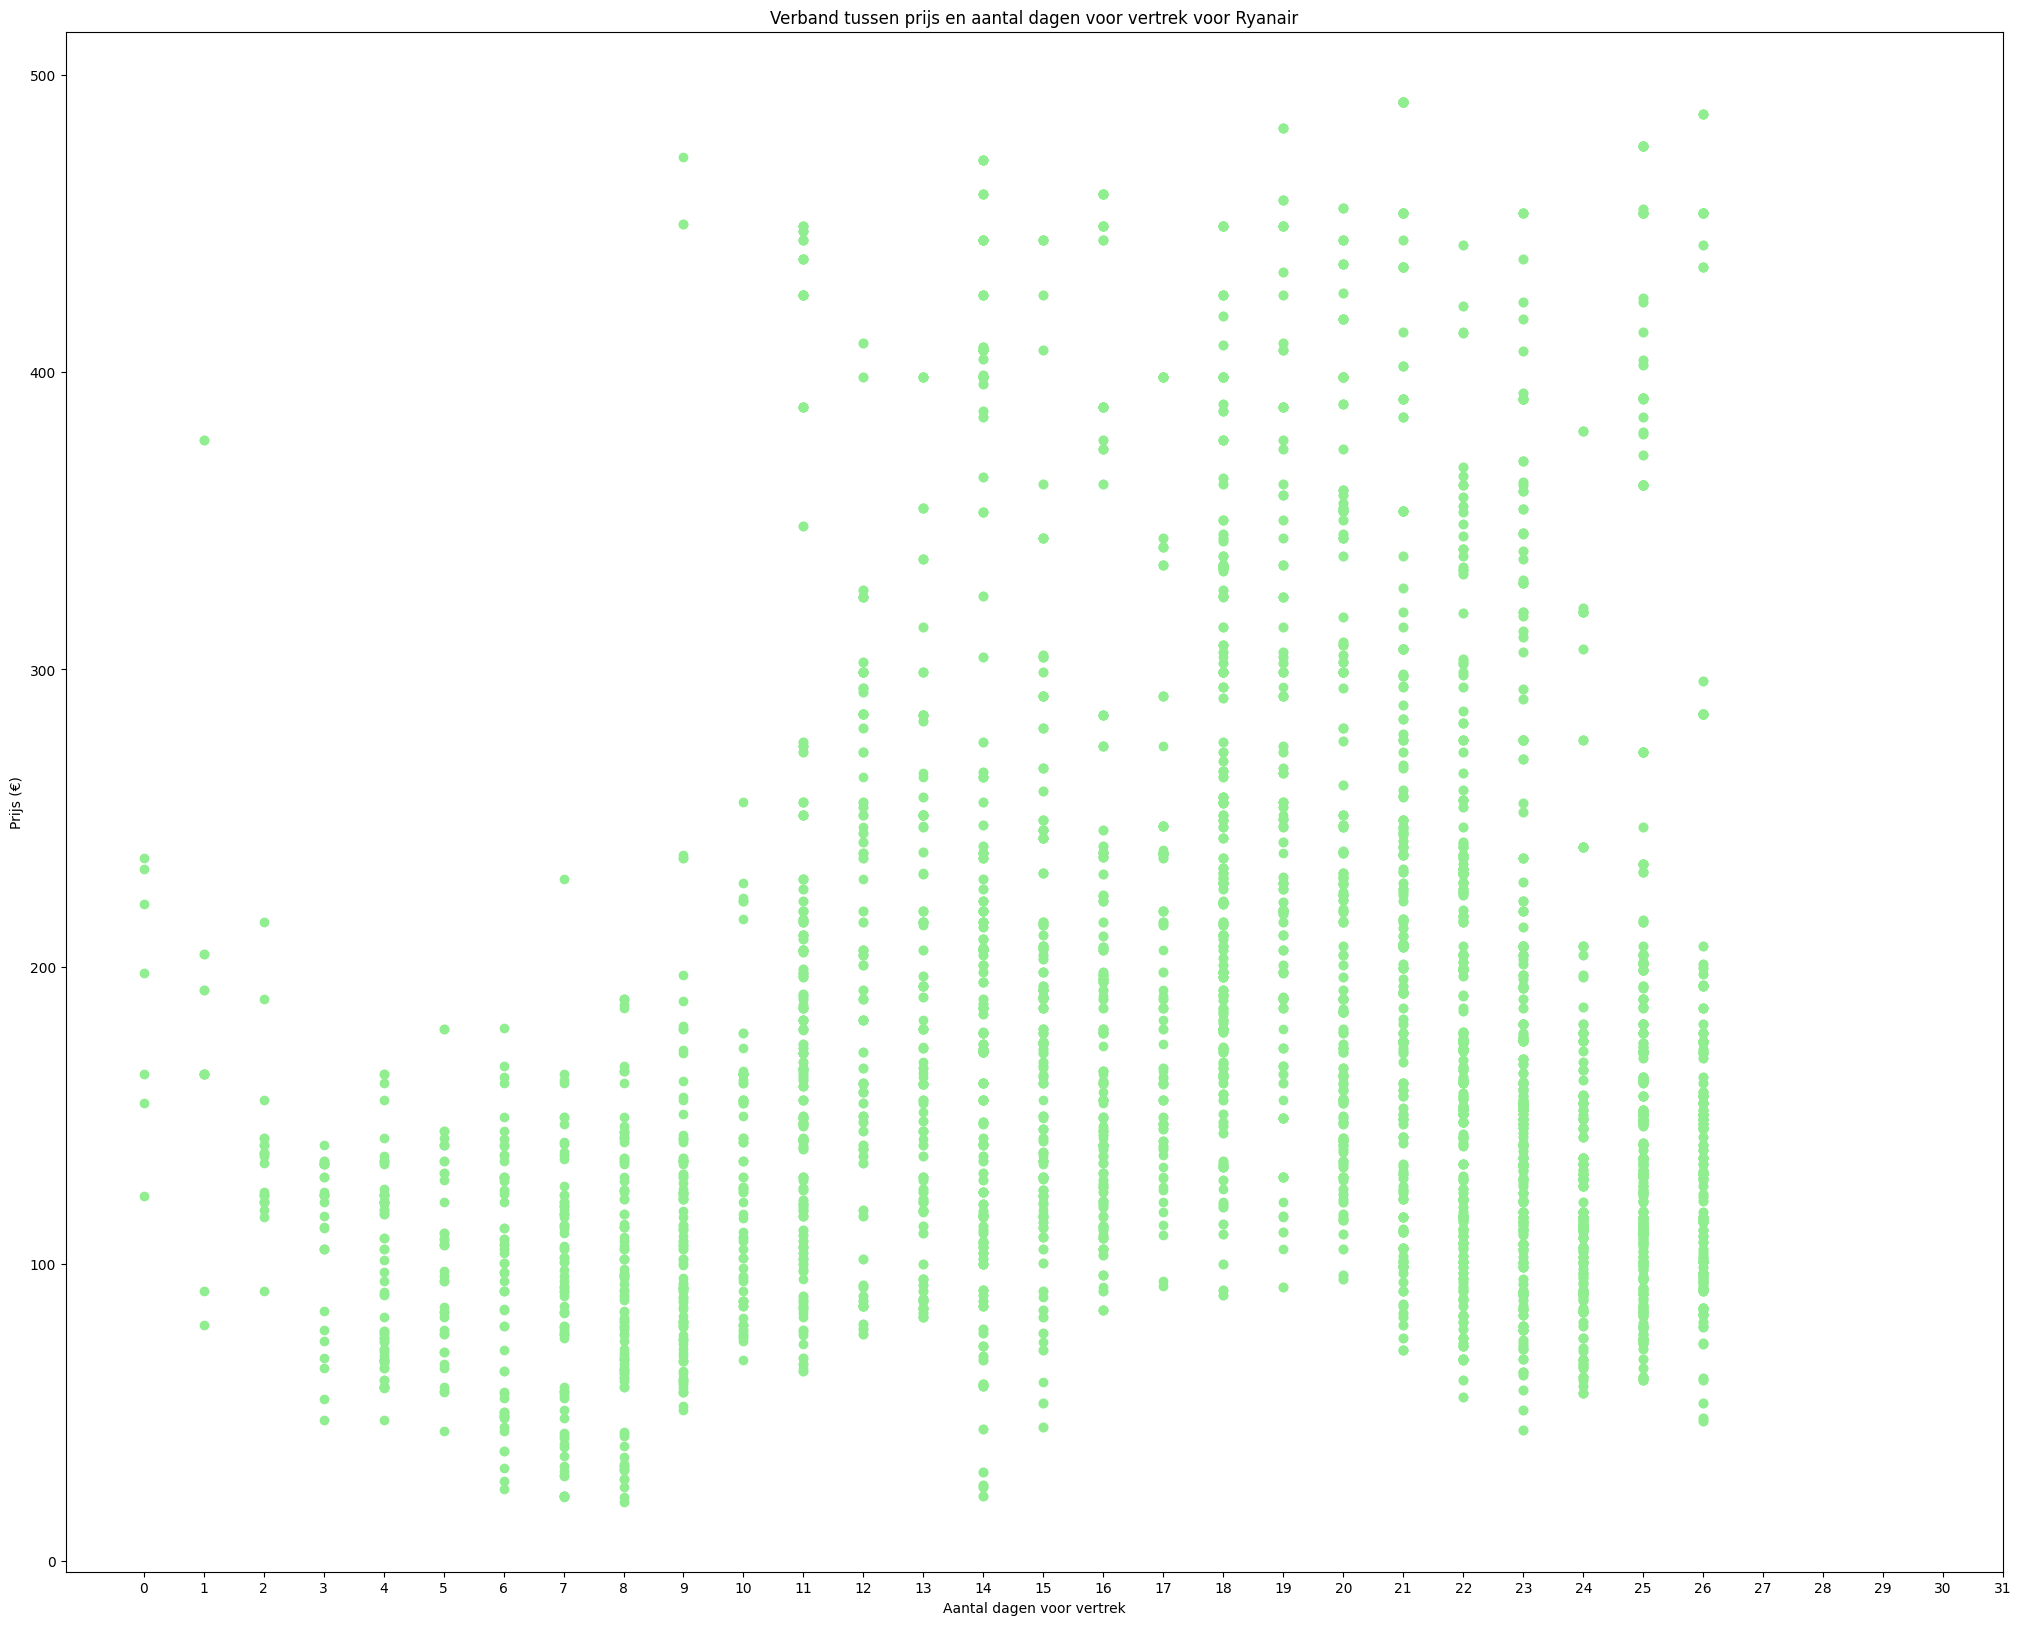

In [10]:
# read the data
data = df

# filter the data for Ryanair
data = data[data['airline_iata_code'] == 'FR']

# convert departure date to datetime object
data['departure_date'] = pd.to_datetime(data['departureDateKey'], format='%Y%m%d')

# add new column for days before departure
data['days_before_departure'] = (data['departure_date'] - data['departure_date'].min()).dt.days

# previous month with datetime
previous_month = datetime.datetime.now() - datetime.timedelta(days=30)

# today with datetime
today = datetime.datetime.now()

# filter the data for the last month ()
data = data[(data['departure_date'] >= previous_month) & (data['departure_date'] <= today)]

# plot the results
plt.figure(figsize=(25, 20))
plt.plot(data['days_before_departure'], data['price'], 'o', color='lightgreen')
plt.title('Verband tussen prijs en aantal dagen voor vertrek voor Ryanair')
plt.xticks(range(0, 32, 1))
plt.xlabel('Aantal dagen voor vertrek')
plt.ylabel('Prijs (€)')

#### Maak gebruik van regressie om de prijzen te voorspellen voor de volgende maand.

#### Linear Regression

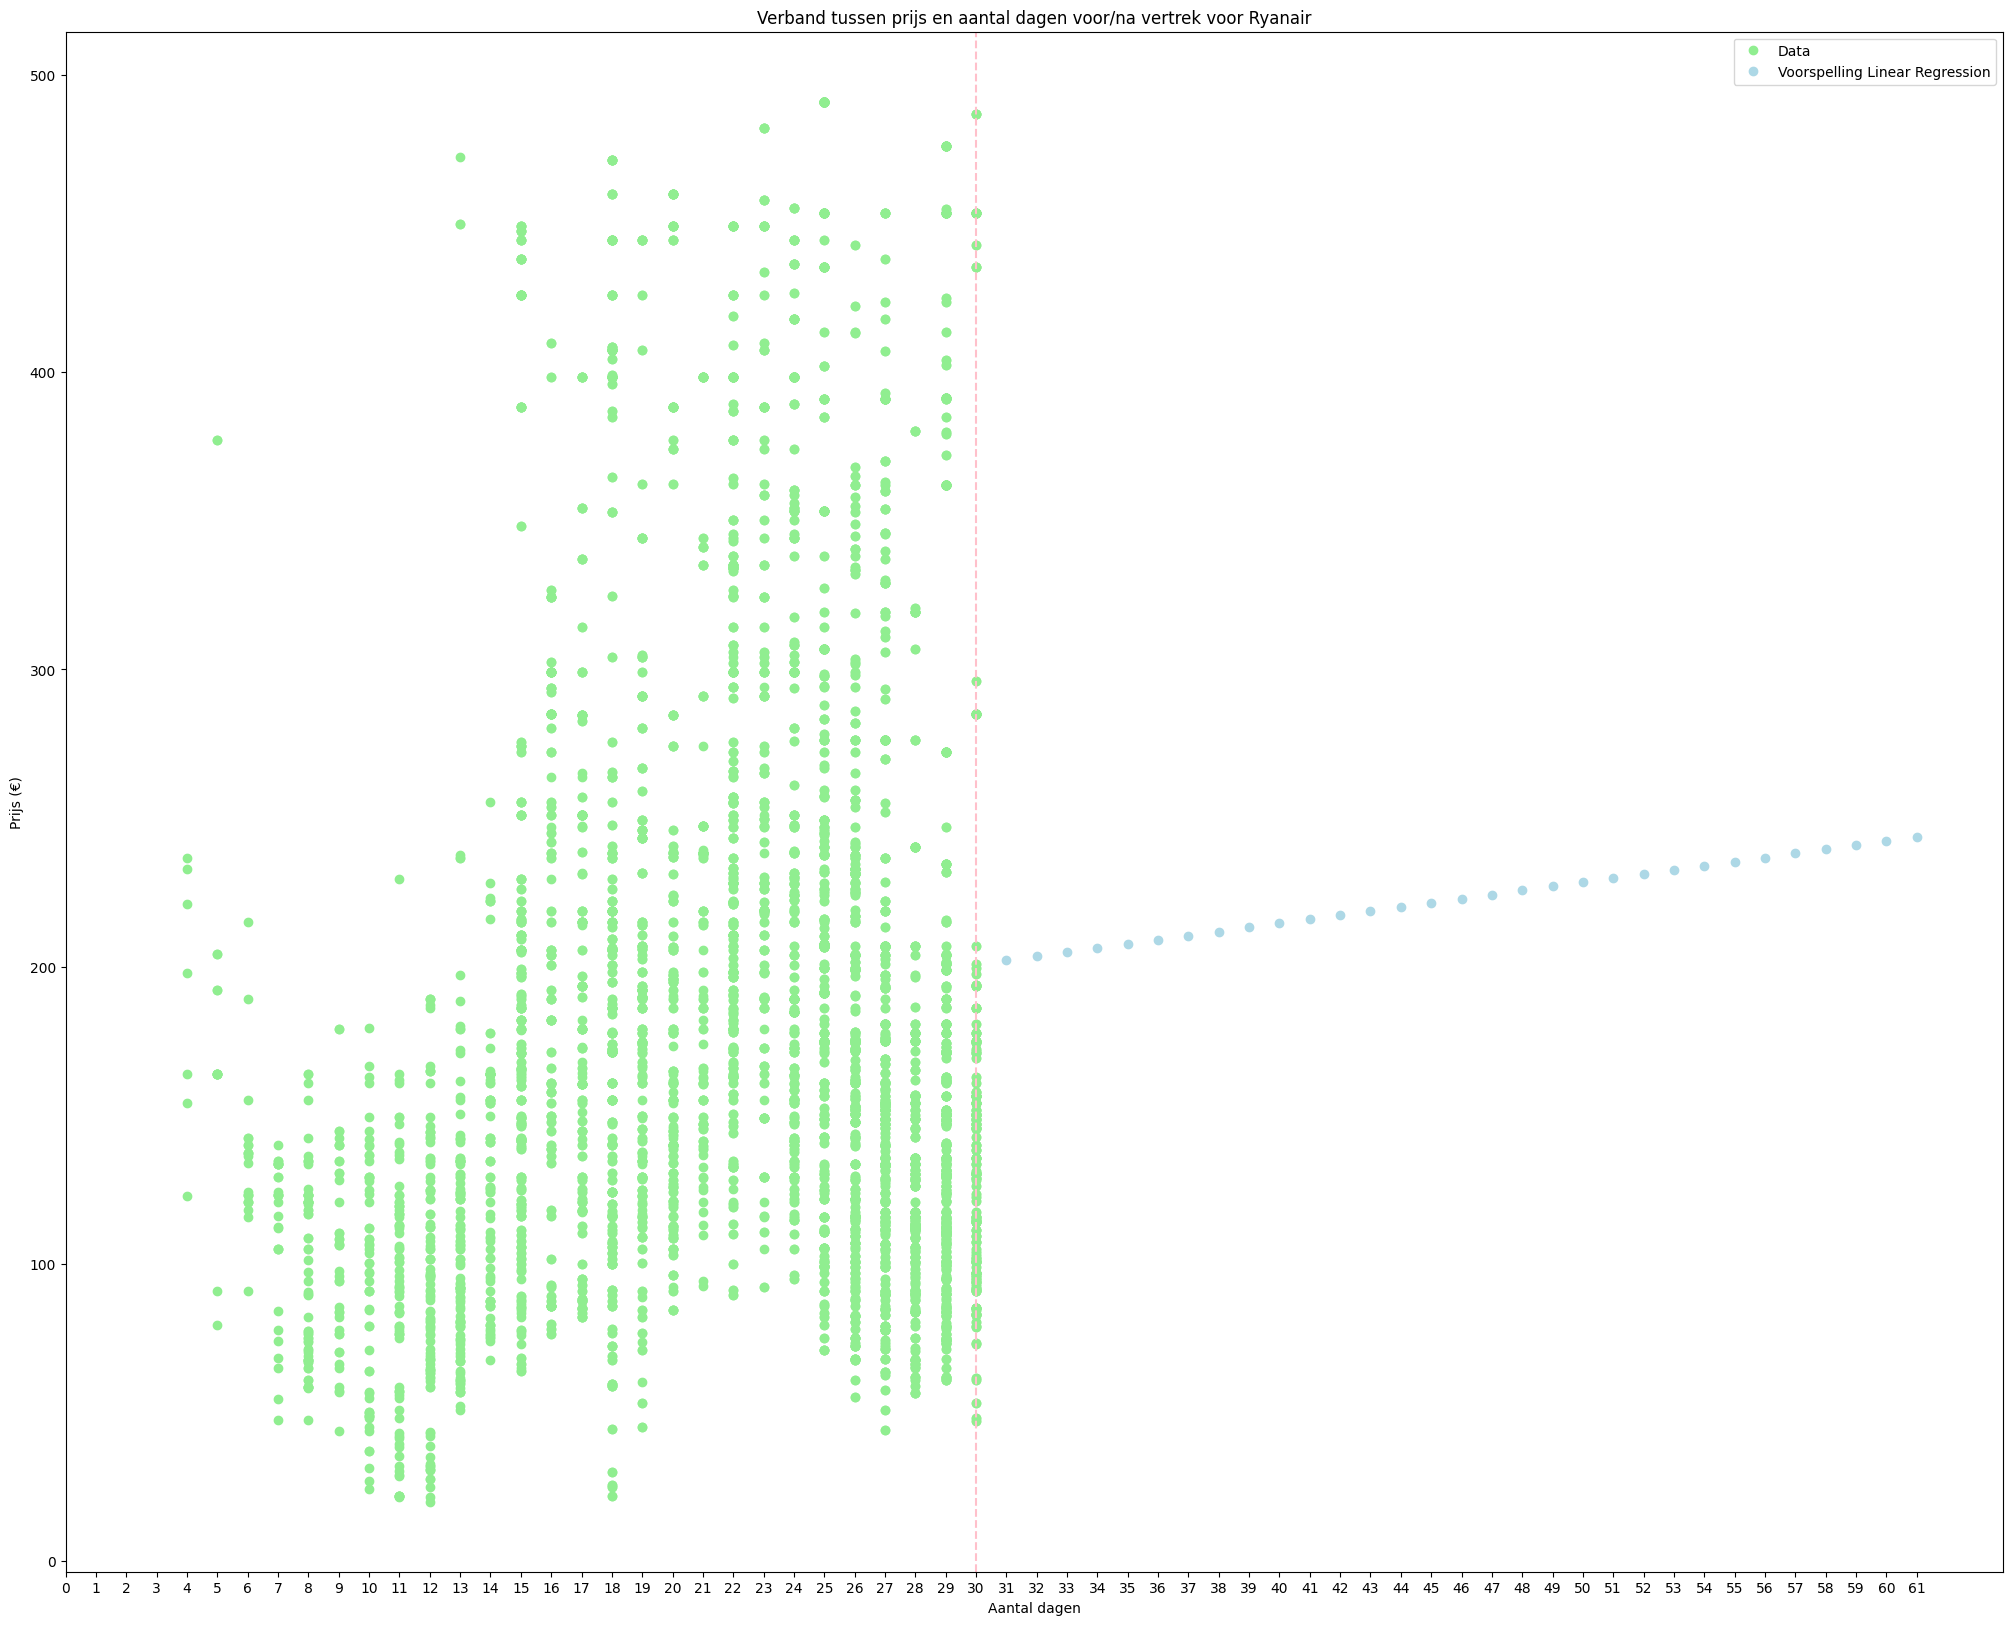

Accuracy score: 0.6397261306919533 %
MSE: 10239.32893944162


In [11]:
# read data for Ryanair only
data = df
data = data[data['airline_iata_code'] == 'FR']

# convert departure date to datetime object
data['departure_date'] = pd.to_datetime(data['departureDateKey'], format='%Y%m%d')

# get date range for last month
today = datetime.date.today()
tomorrow = today + datetime.timedelta(days=1)
last_month = today - pd.DateOffset(months=1)
date_range = pd.date_range(start=last_month, end=today, freq='D')

# filter data for last month
data = data[data['departure_date'].isin(date_range)]

# create linear regression model
lr = LinearRegression(n_jobs=-1)

# fit the model
X_train = (data['departure_date'] - last_month).dt.days.values.reshape(-1, 1)
y_train = data['price'].values.reshape(-1, 1)
lr.fit(X_train, y_train)

# predict prices for next month
next_month = today + pd.DateOffset(months=1)
next_month_range = pd.date_range(start=tomorrow, end=next_month, freq='D')
X_test = (next_month_range - last_month).days.values.reshape(-1, 1)
y_pred_lr = lr.predict(X_test)

# plot results
plt.figure(figsize=(25, 20))
plt.plot(X_train, y_train, 'o', color='lightgreen')
plt.plot(X_test, y_pred_lr, 'o', color='lightblue')
plt.axvline(x=30, color='pink', linestyle='--')
plt.title('Verband tussen prijs en aantal dagen voor/na vertrek voor Ryanair')
plt.xticks(range(0, 62, 1))
plt.xlabel('Aantal dagen')
plt.ylabel('Prijs (€)')
plt.legend(['Data', 'Voorspelling Linear Regression'])
plt.show()

# print the accuracy score and mse
print(f"Accuracy score: {lr.score(X_train, y_train) * 100} %")
print(f"MSE: {mean_squared_error(y_train, lr.predict(X_train))}")

#### Random Forest Regression

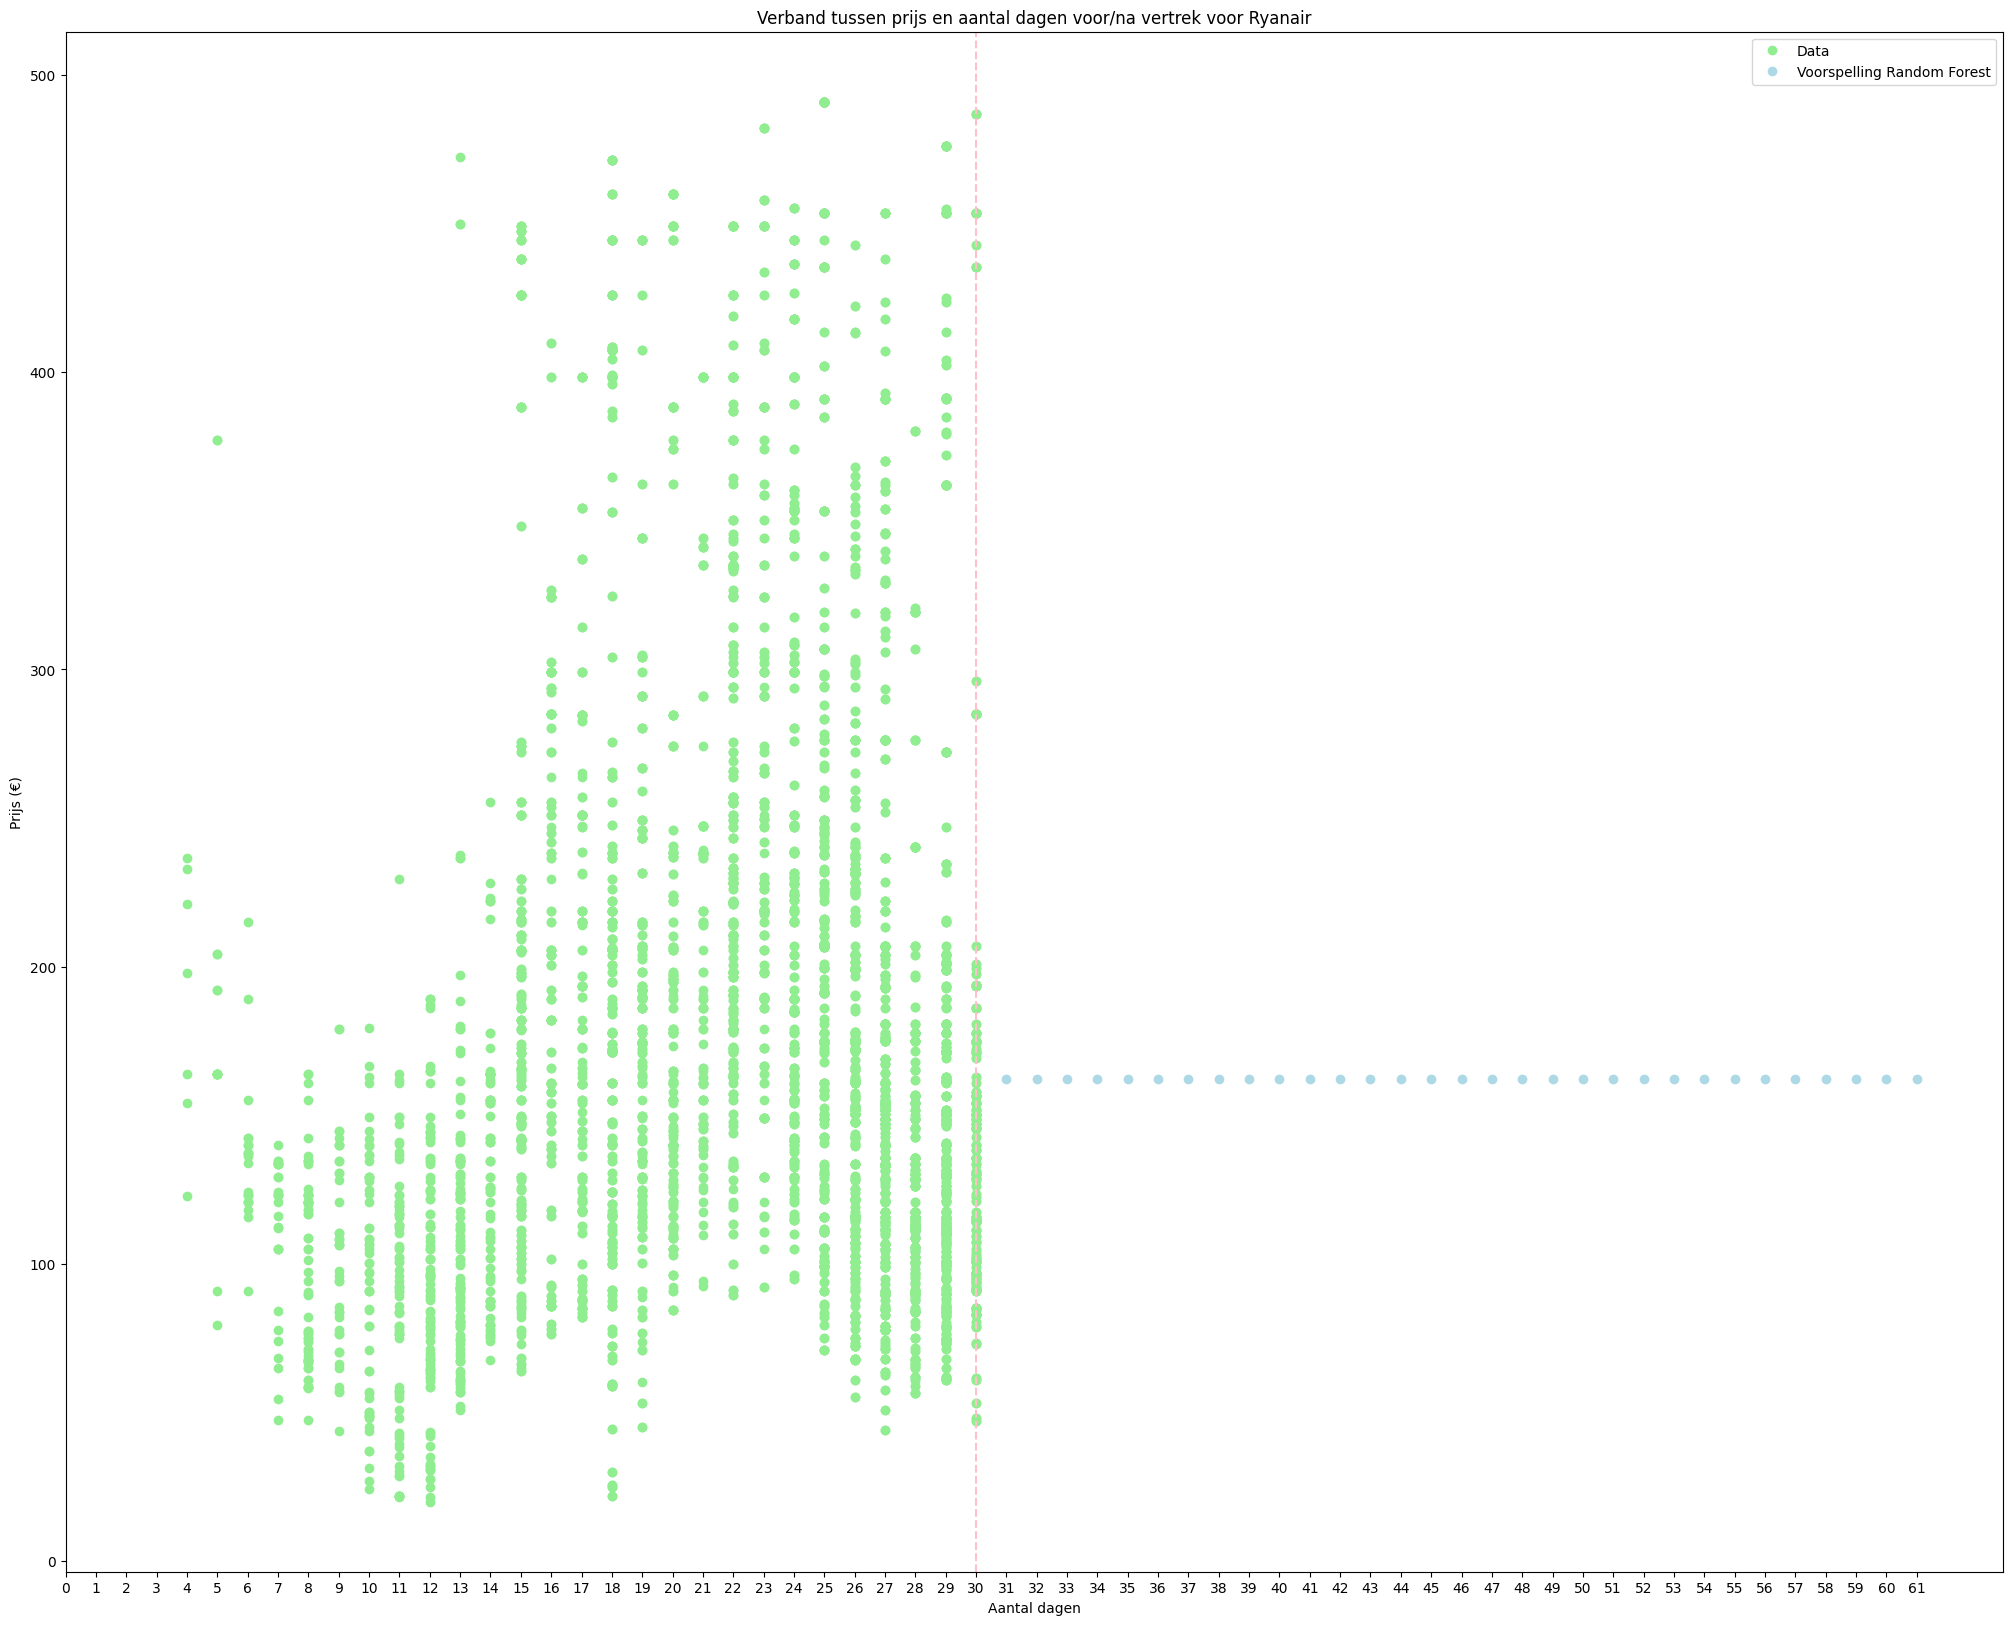

Accuracy score: 18.366489272399278 %
MSE: 8412.540910674134


In [12]:
# read data for Ryanair only
data = df
data = data[data['airline_iata_code'] == 'FR']

# convert departure date to datetime object
data['departure_date'] = pd.to_datetime(data['departureDateKey'], format='%Y%m%d')

# get date range for last month
today = datetime.date.today()
tomorrow = today + datetime.timedelta(days=1)
last_month = today - pd.DateOffset(months=1)
date_range = pd.date_range(start=last_month, end=today, freq='D')

# filter data for last month
data = data[data['departure_date'].isin(date_range)]

# create random forest regression model
rfr = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)

# fit the model
X_train = (data['departure_date'] - last_month).dt.days.values.reshape(-1, 1)
y_train = data['price'].values.reshape(-1, 1)
rfr.fit(X_train, y_train)

# predict prices for next month
next_month = today + pd.DateOffset(months=1)
next_month_range = pd.date_range(start=tomorrow, end=next_month, freq='D')
X_test = (next_month_range - last_month).days.values.reshape(-1, 1)
y_pred_rfr = rfr.predict(X_test)

# plot results
plt.figure(figsize=(25, 20))
plt.plot(X_train, y_train, 'o', color='lightgreen')
plt.plot(X_test, y_pred_rfr, 'o', color='lightblue')
plt.axvline(x=30, color='pink', linestyle='--')
plt.title('Verband tussen prijs en aantal dagen voor/na vertrek voor Ryanair')
plt.xticks(range(0, 62, 1))
plt.xlabel('Aantal dagen')
plt.ylabel('Prijs (€)')
plt.legend(['Data', 'Voorspelling Random Forest'])
plt.show()

# print the accuracy score and mse
print(f"Accuracy score: {rfr.score(X_train, y_train) * 100} %")
print(f"MSE: {mean_squared_error(y_train, rfr.predict(X_train))}")

#### Hard Voting

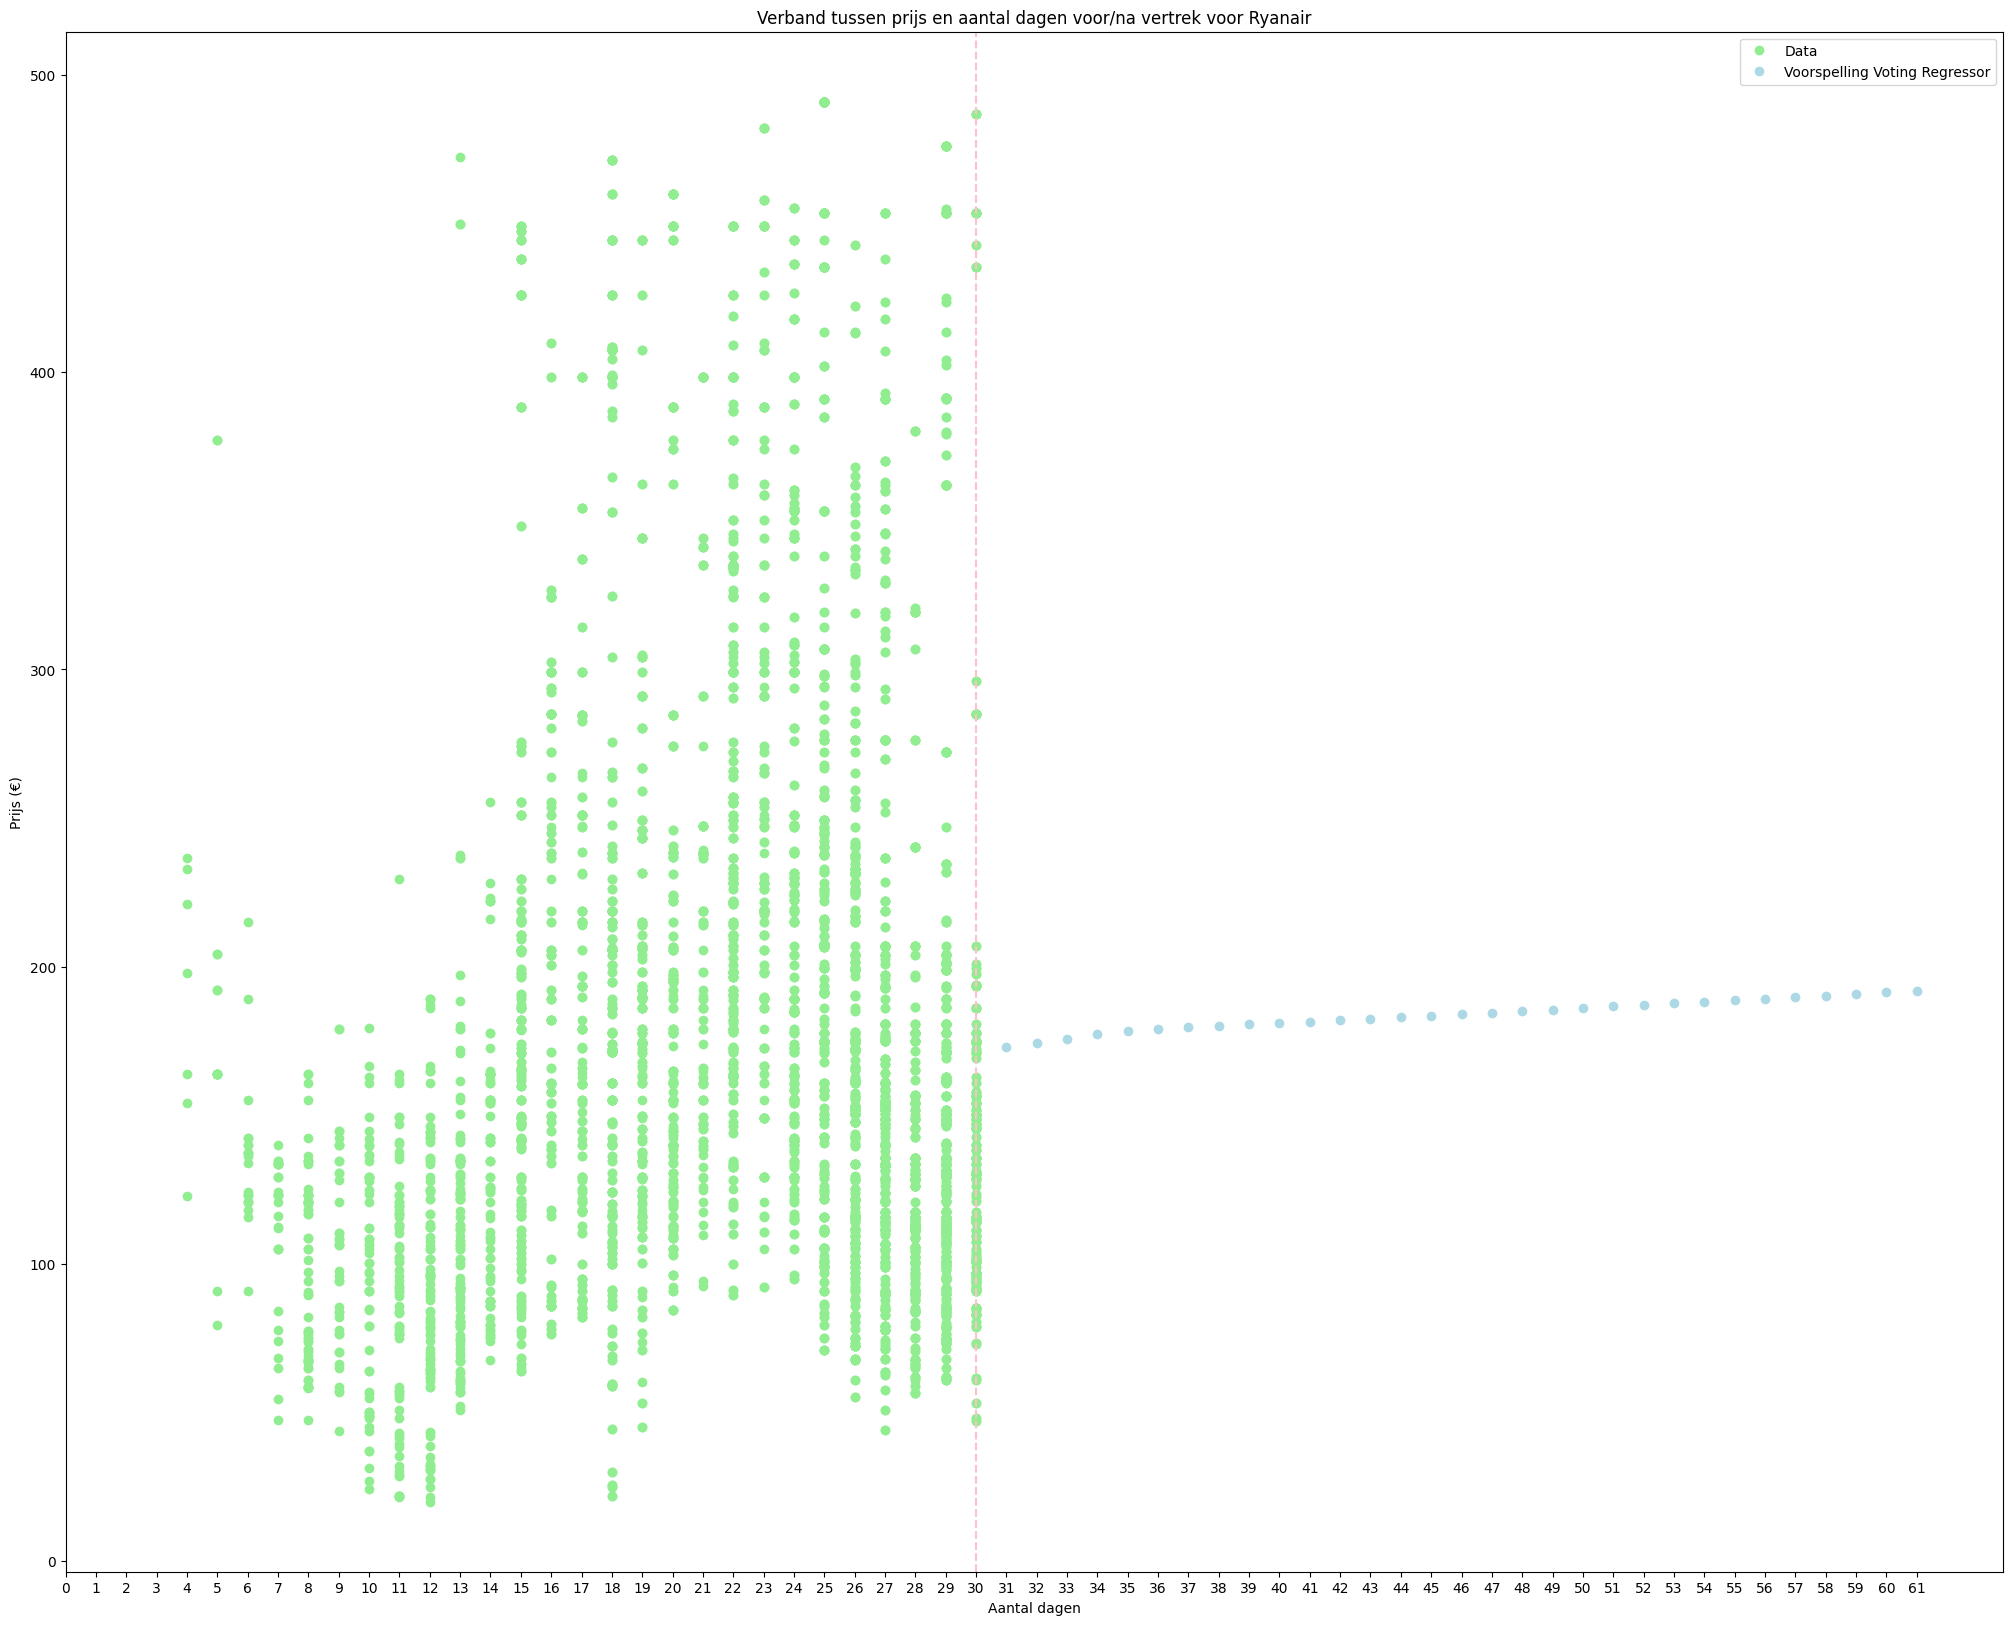

Accuracy score: 15.517672373015456 %
MSE: 8706.118737959507


In [13]:
# create the regression models
lr = LinearRegression(n_jobs=-1)
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
gb = GradientBoostingRegressor(random_state=42)
dt = DecisionTreeRegressor(random_state=42)
sgd = SGDRegressor(random_state=42)
svr = SVR()

# create the voting regressor
vr = VotingRegressor([('lr', lr), ('rf', rf), ('gb', gb), ('dt', dt), ('sgd', sgd), ('svr', svr)])

# fit the model
vr.fit(X_train, y_train)

# predict prices for next month
next_month = today + pd.DateOffset(months=1)
next_month_range = pd.date_range(start=tomorrow, end=next_month, freq='D')
X_test = (next_month_range - last_month).days.values.reshape(-1, 1)
y_pred_vr = vr.predict(X_test)

# plot results
plt.figure(figsize=(25, 20))
plt.plot(X_train, y_train, 'o', color='lightgreen')
plt.plot(X_test, y_pred_vr, 'o', color='lightblue')
plt.axvline(x=30, color='pink', linestyle='--')
plt.title('Verband tussen prijs en aantal dagen voor/na vertrek voor Ryanair')
plt.xticks(range(0, 62, 1))
plt.xlabel('Aantal dagen')
plt.ylabel('Prijs (€)')
plt.legend(['Data', 'Voorspelling Voting Regressor'])
plt.show()

# print the accuracy score and mse
print(f"Accuracy score: {vr.score(X_train, y_train) * 100} %")
print(f"MSE: {mean_squared_error(y_train, vr.predict(X_train))}")

#### Decision Tree Regressor

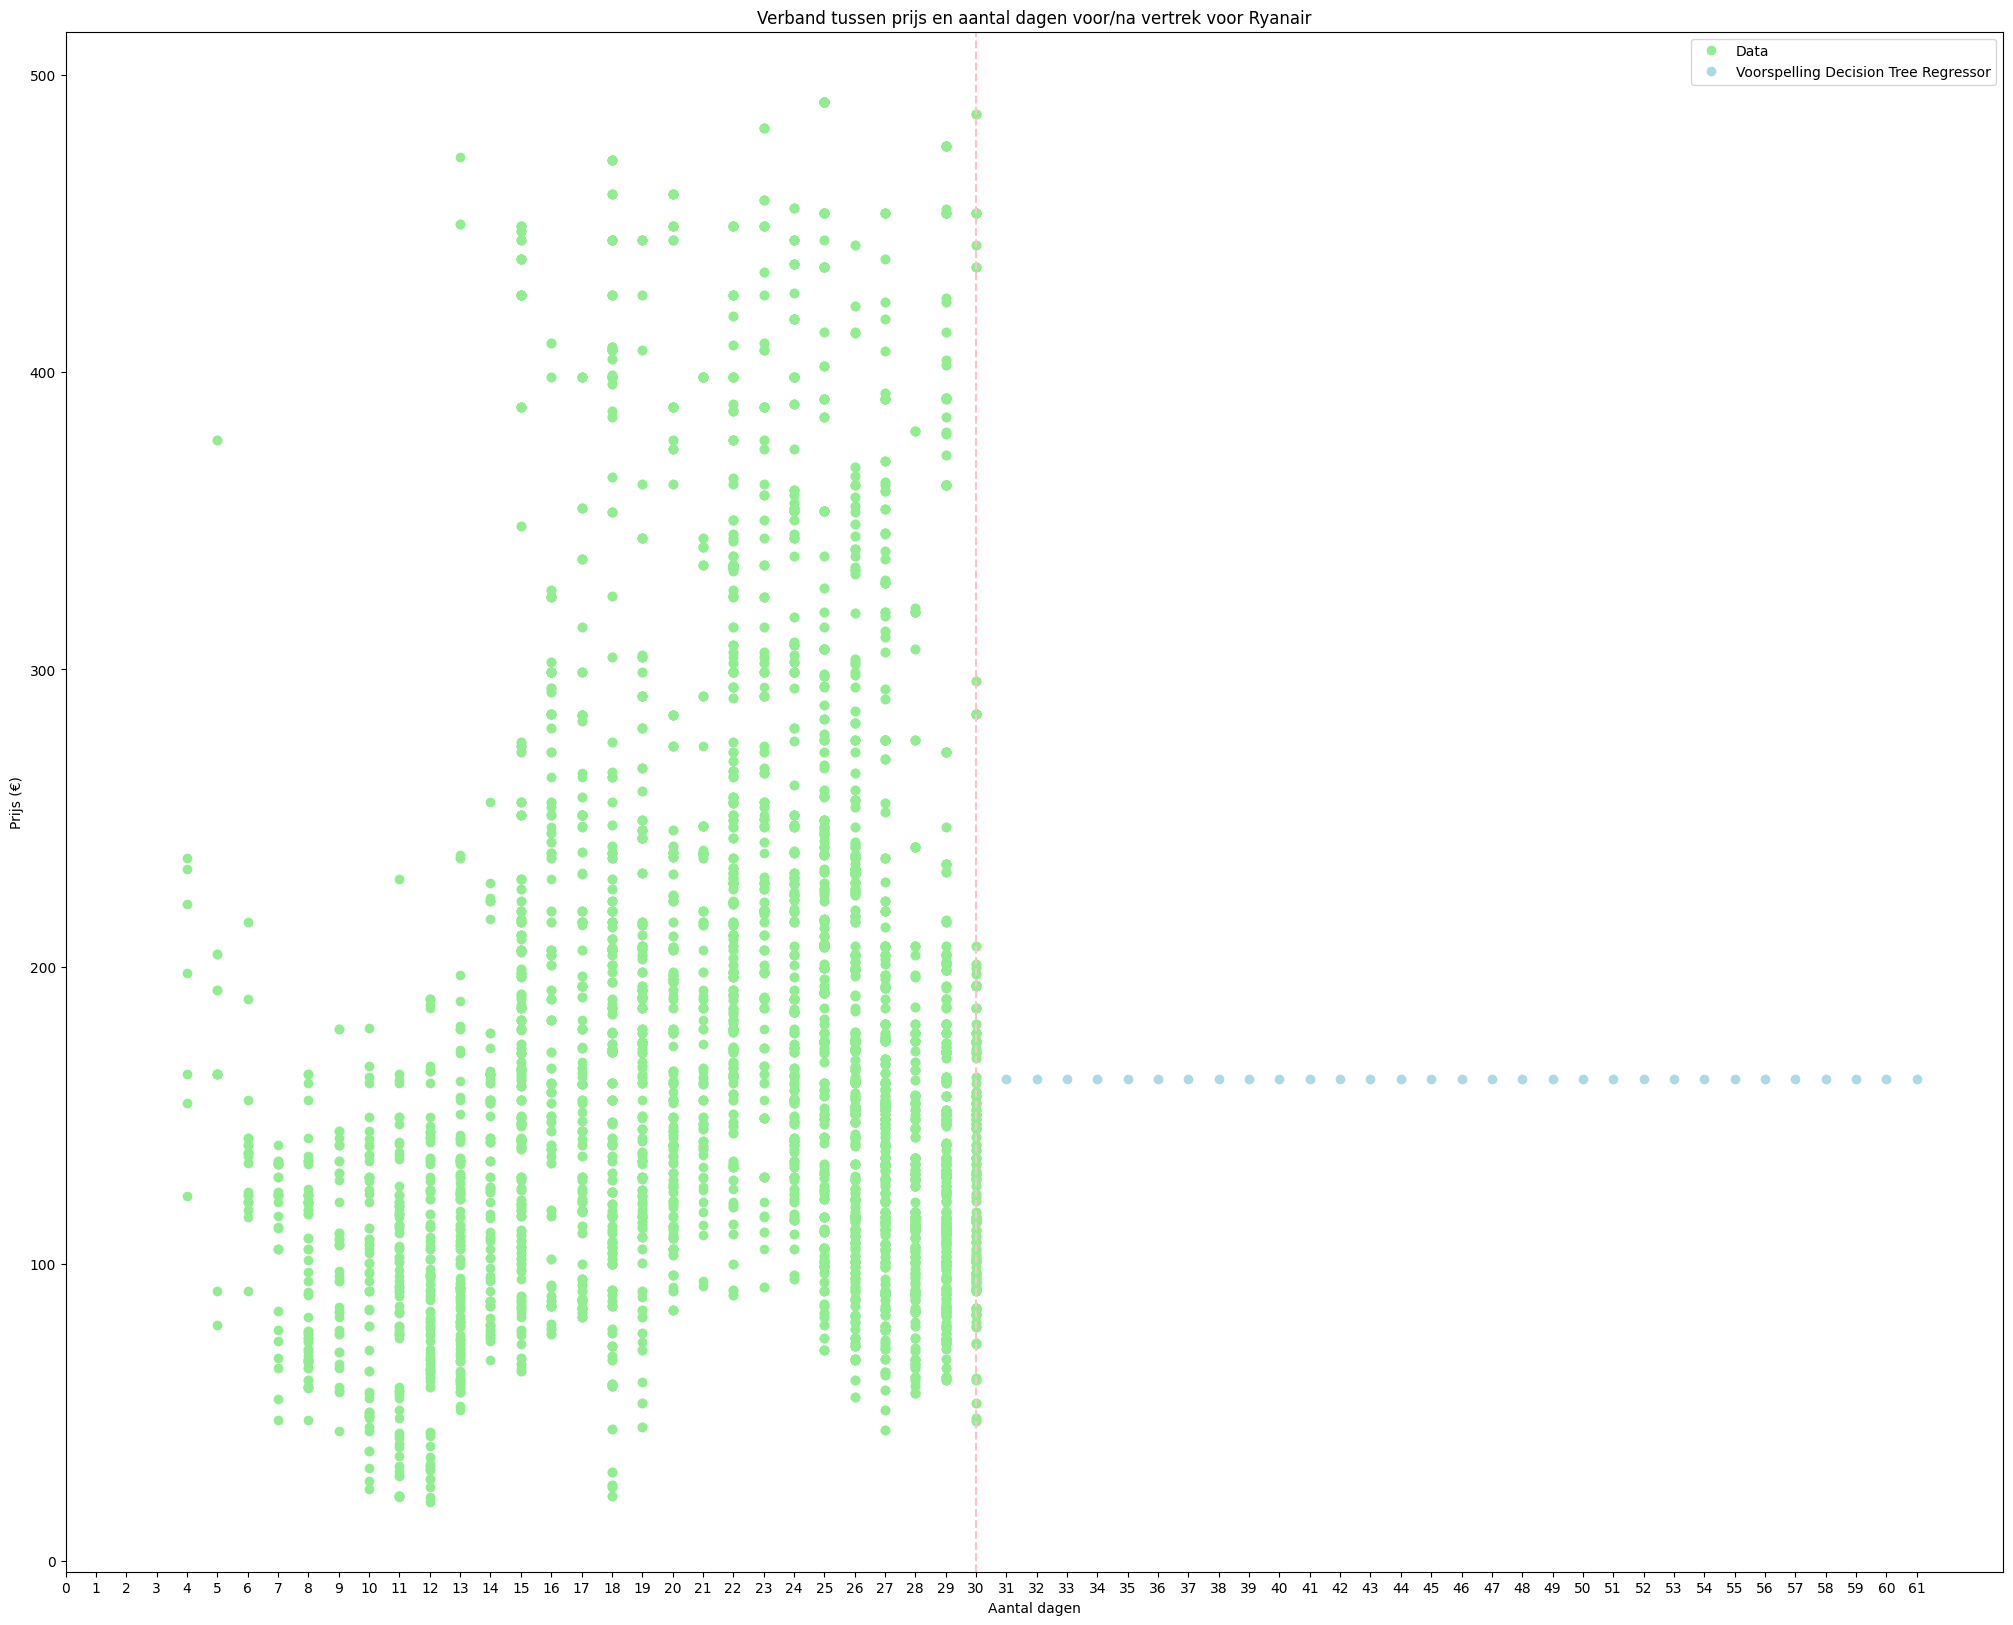

Accuracy score: 18.368597425295906 %
MSE: 8412.32366015617


In [14]:
# read data for Ryanair only
data = df
data = data[data['airline_iata_code'] == 'FR']

# convert departure date to datetime object
data['departure_date'] = pd.to_datetime(data['departureDateKey'], format='%Y%m%d')

# get date range for last month
today = datetime.date.today()
tomorrow = today + datetime.timedelta(days=1)
last_month = today - pd.DateOffset(months=1)
date_range = pd.date_range(start=last_month, end=today, freq='D')

# filter data for last month
data = data[data['departure_date'].isin(date_range)]

# create decision tree regression model
dtr = DecisionTreeRegressor(random_state=42)

# fit the model
X_train = (data['departure_date'] - last_month).dt.days.values.reshape(-1, 1)
y_train = data['price'].values.reshape(-1, 1)
dtr.fit(X_train, y_train)

# predict prices for next month
next_month = today + pd.DateOffset(months=1)
next_month_range = pd.date_range(start=tomorrow, end=next_month, freq='D')
X_test = (next_month_range - last_month).days.values.reshape(-1, 1)
y_pred_dtr = dtr.predict(X_test)

# plot results
plt.figure(figsize=(25, 20))
plt.plot(X_train, y_train, 'o', color='lightgreen')
plt.plot(X_test, y_pred_dtr, 'o', color='lightblue')
plt.axvline(x=30, color='pink', linestyle='--')
plt.title('Verband tussen prijs en aantal dagen voor/na vertrek voor Ryanair')
plt.xticks(range(0, 62, 1))
plt.xlabel('Aantal dagen')
plt.ylabel('Prijs (€)')
plt.legend(['Data', 'Voorspelling Decision Tree Regressor'])
plt.show()

# print the accuracy score and mse
print(f"Accuracy score: {dtr.score(X_train, y_train) * 100} %")
print(f"MSE: {mean_squared_error(y_train, dtr.predict(X_train))}")

#### Gradient Boosting Regressor

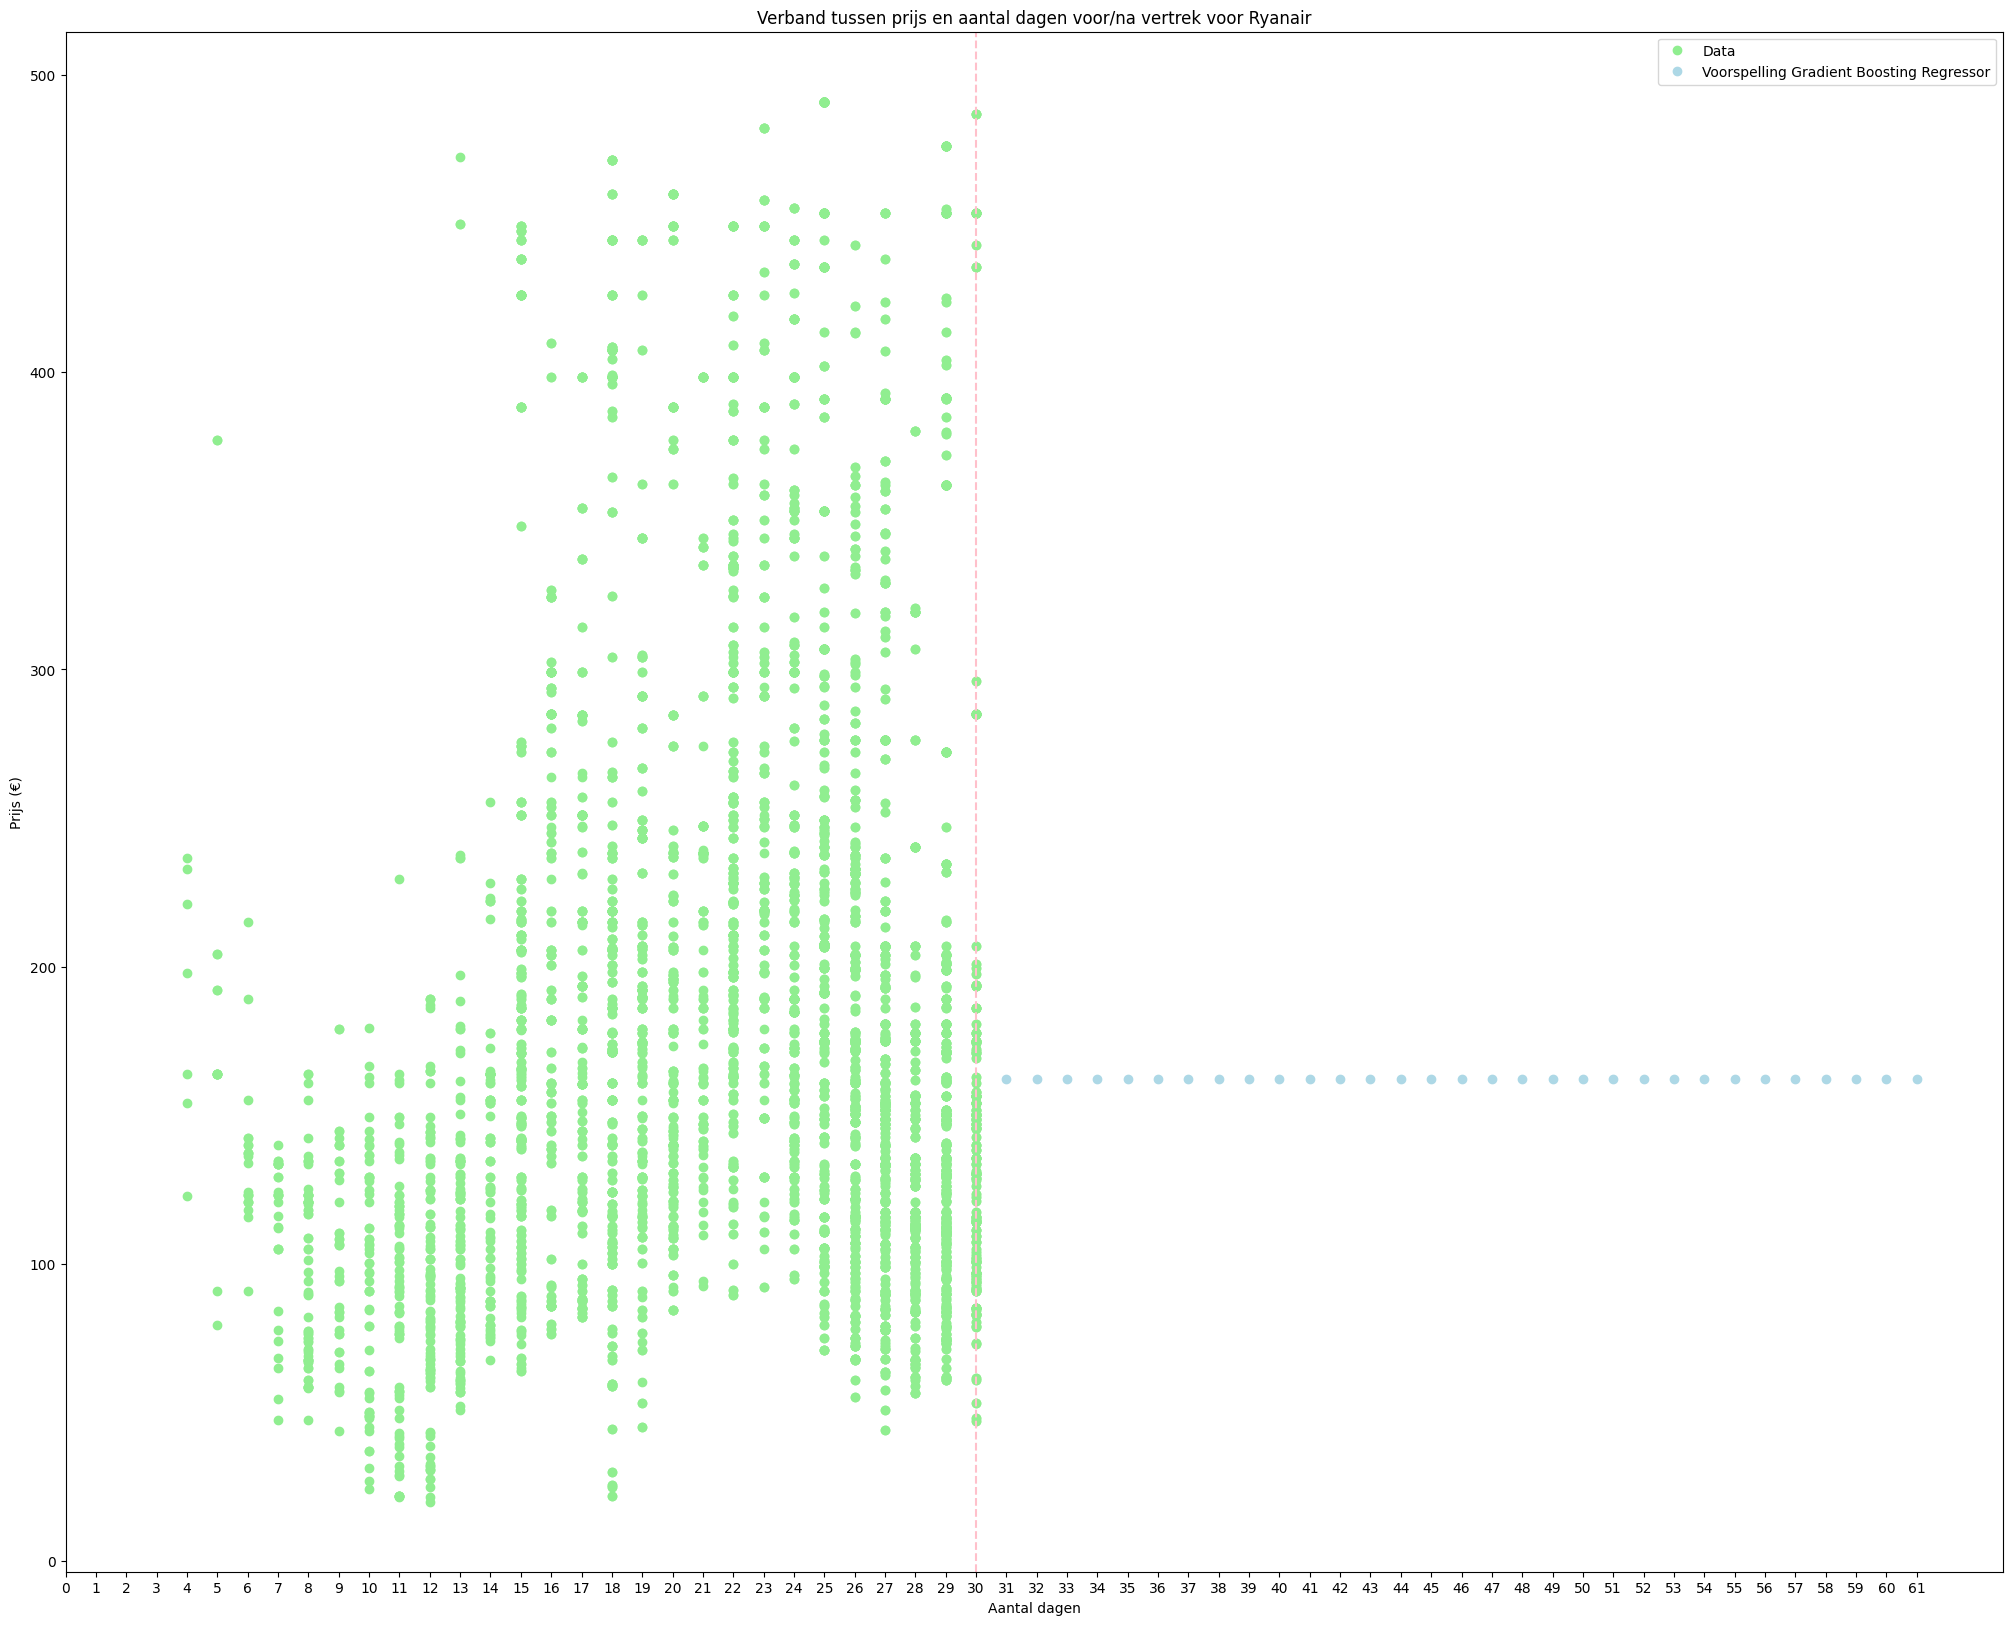

Accuracy score: 18.36625303999081 %
MSE: 8412.56525502467


In [15]:
# read data for Ryanair only
data = df
data = data[data['airline_iata_code'] == 'FR']

# convert departure date to datetime object
data['departure_date'] = pd.to_datetime(data['departureDateKey'], format='%Y%m%d')

# get date range for last month
today = datetime.date.today()
tomorrow = today + datetime.timedelta(days=1)
last_month = today - pd.DateOffset(months=1)
date_range = pd.date_range(start=last_month, end=today, freq='D')

# filter data for last month
data = data[data['departure_date'].isin(date_range)]

# create gradient boosting regression model
gbr = GradientBoostingRegressor(random_state=42)

# fit the model
X_train = (data['departure_date'] - last_month).dt.days.values.reshape(-1, 1)
y_train = data['price'].values.reshape(-1, 1)
gbr.fit(X_train, y_train)

# predict prices for next month
next_month = today + pd.DateOffset(months=1)
next_month_range = pd.date_range(start=tomorrow, end=next_month, freq='D')
X_test = (next_month_range - last_month).days.values.reshape(-1, 1)
y_pred_gbr = gbr.predict(X_test)

# plot results
plt.figure(figsize=(25, 20))
plt.plot(X_train, y_train, 'o', color='lightgreen')
plt.plot(X_test, y_pred_gbr, 'o', color='lightblue')
plt.axvline(x=30, color='pink', linestyle='--')
plt.title('Verband tussen prijs en aantal dagen voor/na vertrek voor Ryanair')
plt.xticks(range(0, 62, 1))
plt.xlabel('Aantal dagen')
plt.ylabel('Prijs (€)')
plt.legend(['Data', 'Voorspelling Gradient Boosting Regressor'])
plt.show()

# print the accuracy score and mse
print(f"Accuracy score: {gbr.score(X_train, y_train) * 100} %")
print(f"MSE: {mean_squared_error(y_train, gbr.predict(X_train))}")

#### Stochastic Gradient Descent Regressor

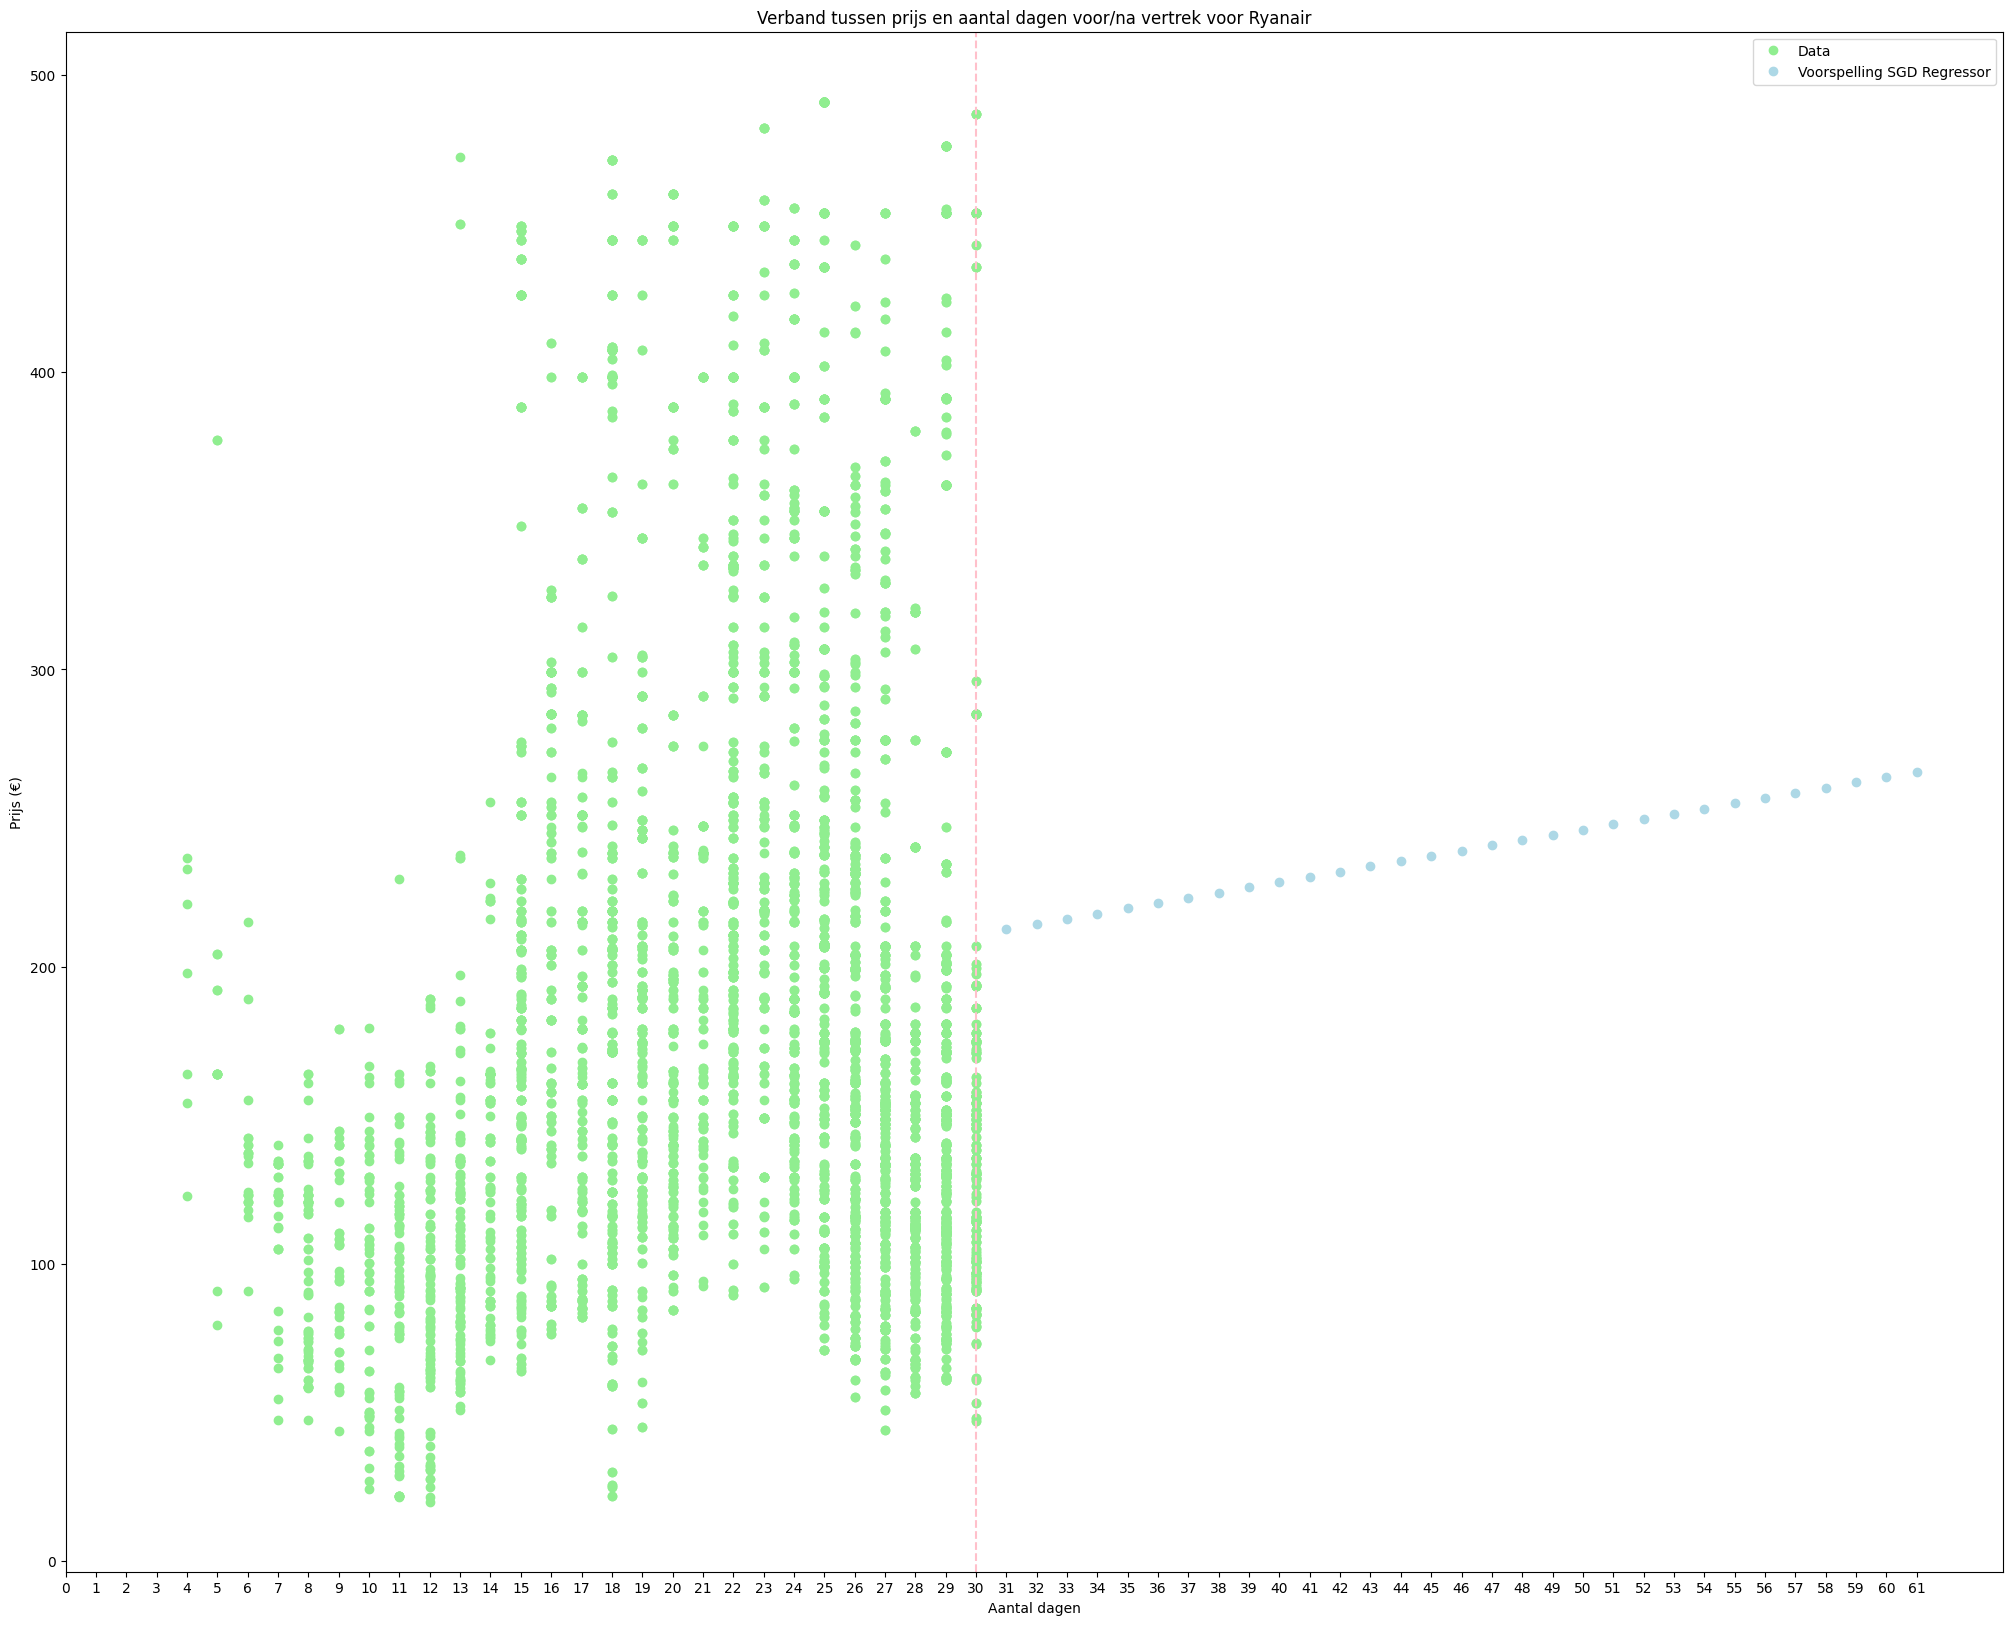

Accuracy score: 0.08076221617536739 %
MSE: 10296.931592525503


In [16]:
# read data for Ryanair only
data = df
data = data[data['airline_iata_code'] == 'FR']

# convert departure date to datetime object
data['departure_date'] = pd.to_datetime(data['departureDateKey'], format='%Y%m%d')

# get date range for last month
today = datetime.date.today()
tomorrow = today + datetime.timedelta(days=1)
last_month = today - pd.DateOffset(months=1)
date_range = pd.date_range(start=last_month, end=today, freq='D')

# filter data for last month
data = data[data['departure_date'].isin(date_range)]

# create sgd regression model
sgd = SGDRegressor(random_state=42)

# fit the model
X_train = (data['departure_date'] - last_month).dt.days.values.reshape(-1, 1)
y_train = data['price'].values.reshape(-1, 1)
sgd.fit(X_train, y_train)

# predict prices for next month
next_month = today + pd.DateOffset(months=1)
next_month_range = pd.date_range(start=tomorrow, end=next_month, freq='D')
X_test = (next_month_range - last_month).days.values.reshape(-1, 1)
y_pred_sgd = sgd.predict(X_test)

# plot results
plt.figure(figsize=(25, 20))
plt.plot(X_train, y_train, 'o', color='lightgreen')
plt.plot(X_test, y_pred_sgd, 'o', color='lightblue')
plt.axvline(x=30, color='pink', linestyle='--')
plt.title('Verband tussen prijs en aantal dagen voor/na vertrek voor Ryanair')
plt.xticks(range(0, 62, 1))
plt.xlabel('Aantal dagen')
plt.ylabel('Prijs (€)')
plt.legend(['Data', 'Voorspelling SGD Regressor'])
plt.show()

# print the accuracy score and mse
print(f"Accuracy score: {sgd.score(X_train, y_train) * 100} %")
print(f"MSE: {mean_squared_error(y_train, sgd.predict(X_train))}")

#### SVR

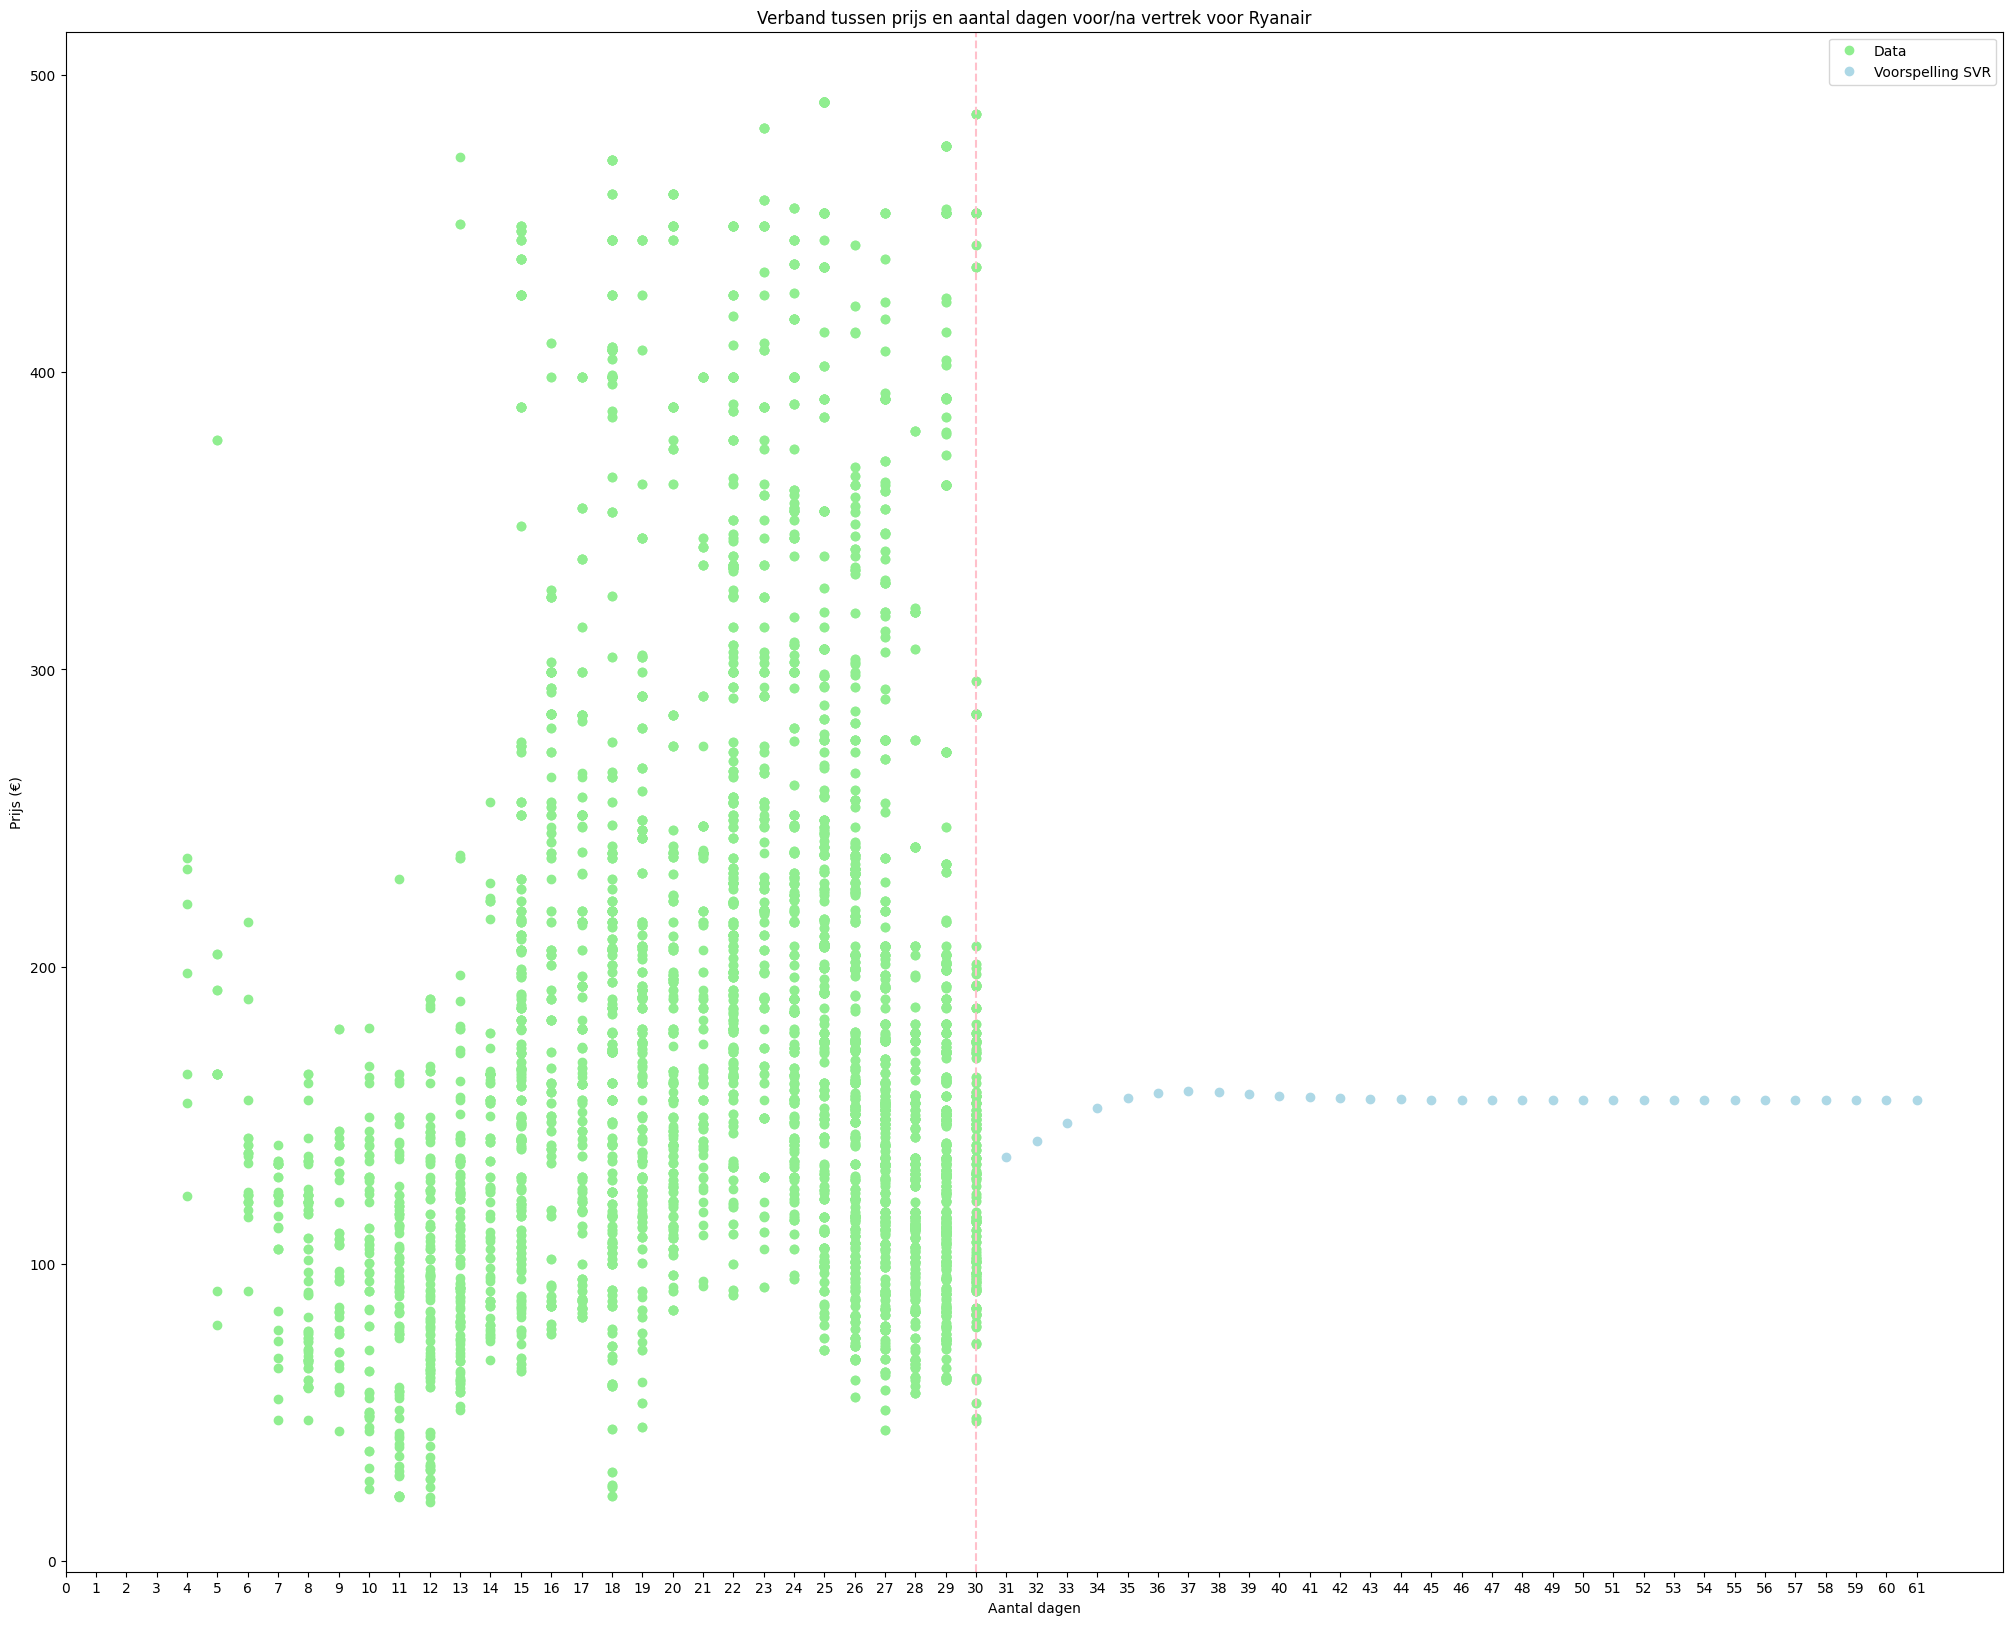

Accuracy score: 8.555145606922121 %
MSE: 9423.62482999654


In [17]:
# read data for Ryanair only
data = df
data = data[data['airline_iata_code'] == 'FR']

# convert departure date to datetime object
data['departure_date'] = pd.to_datetime(data['departureDateKey'], format='%Y%m%d')

# get date range for last month
today = datetime.date.today()
tomorrow = today + datetime.timedelta(days=1)
last_month = today - pd.DateOffset(months=1)
date_range = pd.date_range(start=last_month, end=today, freq='D')

# filter data for last month
data = data[data['departure_date'].isin(date_range)]

# create svr regression model
svr = SVR()

# fit the model
X_train = (data['departure_date'] - last_month).dt.days.values.reshape(-1, 1)
y_train = data['price'].values.reshape(-1, 1)
svr.fit(X_train, y_train)

# predict prices for next month
next_month = today + pd.DateOffset(months=1)
next_month_range = pd.date_range(start=tomorrow, end=next_month, freq='D')
X_test = (next_month_range - last_month).days.values.reshape(-1, 1)
y_pred_svr = svr.predict(X_test)

# plot results
plt.figure(figsize=(25, 20))
plt.plot(X_train, y_train, 'o', color='lightgreen')
plt.plot(X_test, y_pred_svr, 'o', color='lightblue')
plt.axvline(x=30, color='pink', linestyle='--')
plt.title('Verband tussen prijs en aantal dagen voor/na vertrek voor Ryanair')
plt.xticks(range(0, 62, 1))
plt.xlabel('Aantal dagen')
plt.ylabel('Prijs (€)')
plt.legend(['Data', 'Voorspelling SVR'])
plt.show()

# print the accuracy score and mse
print(f"Accuracy score: {svr.score(X_train, y_train) * 100} %")
print(f"MSE: {mean_squared_error(y_train, svr.predict(X_train))}")

#### Grid Search

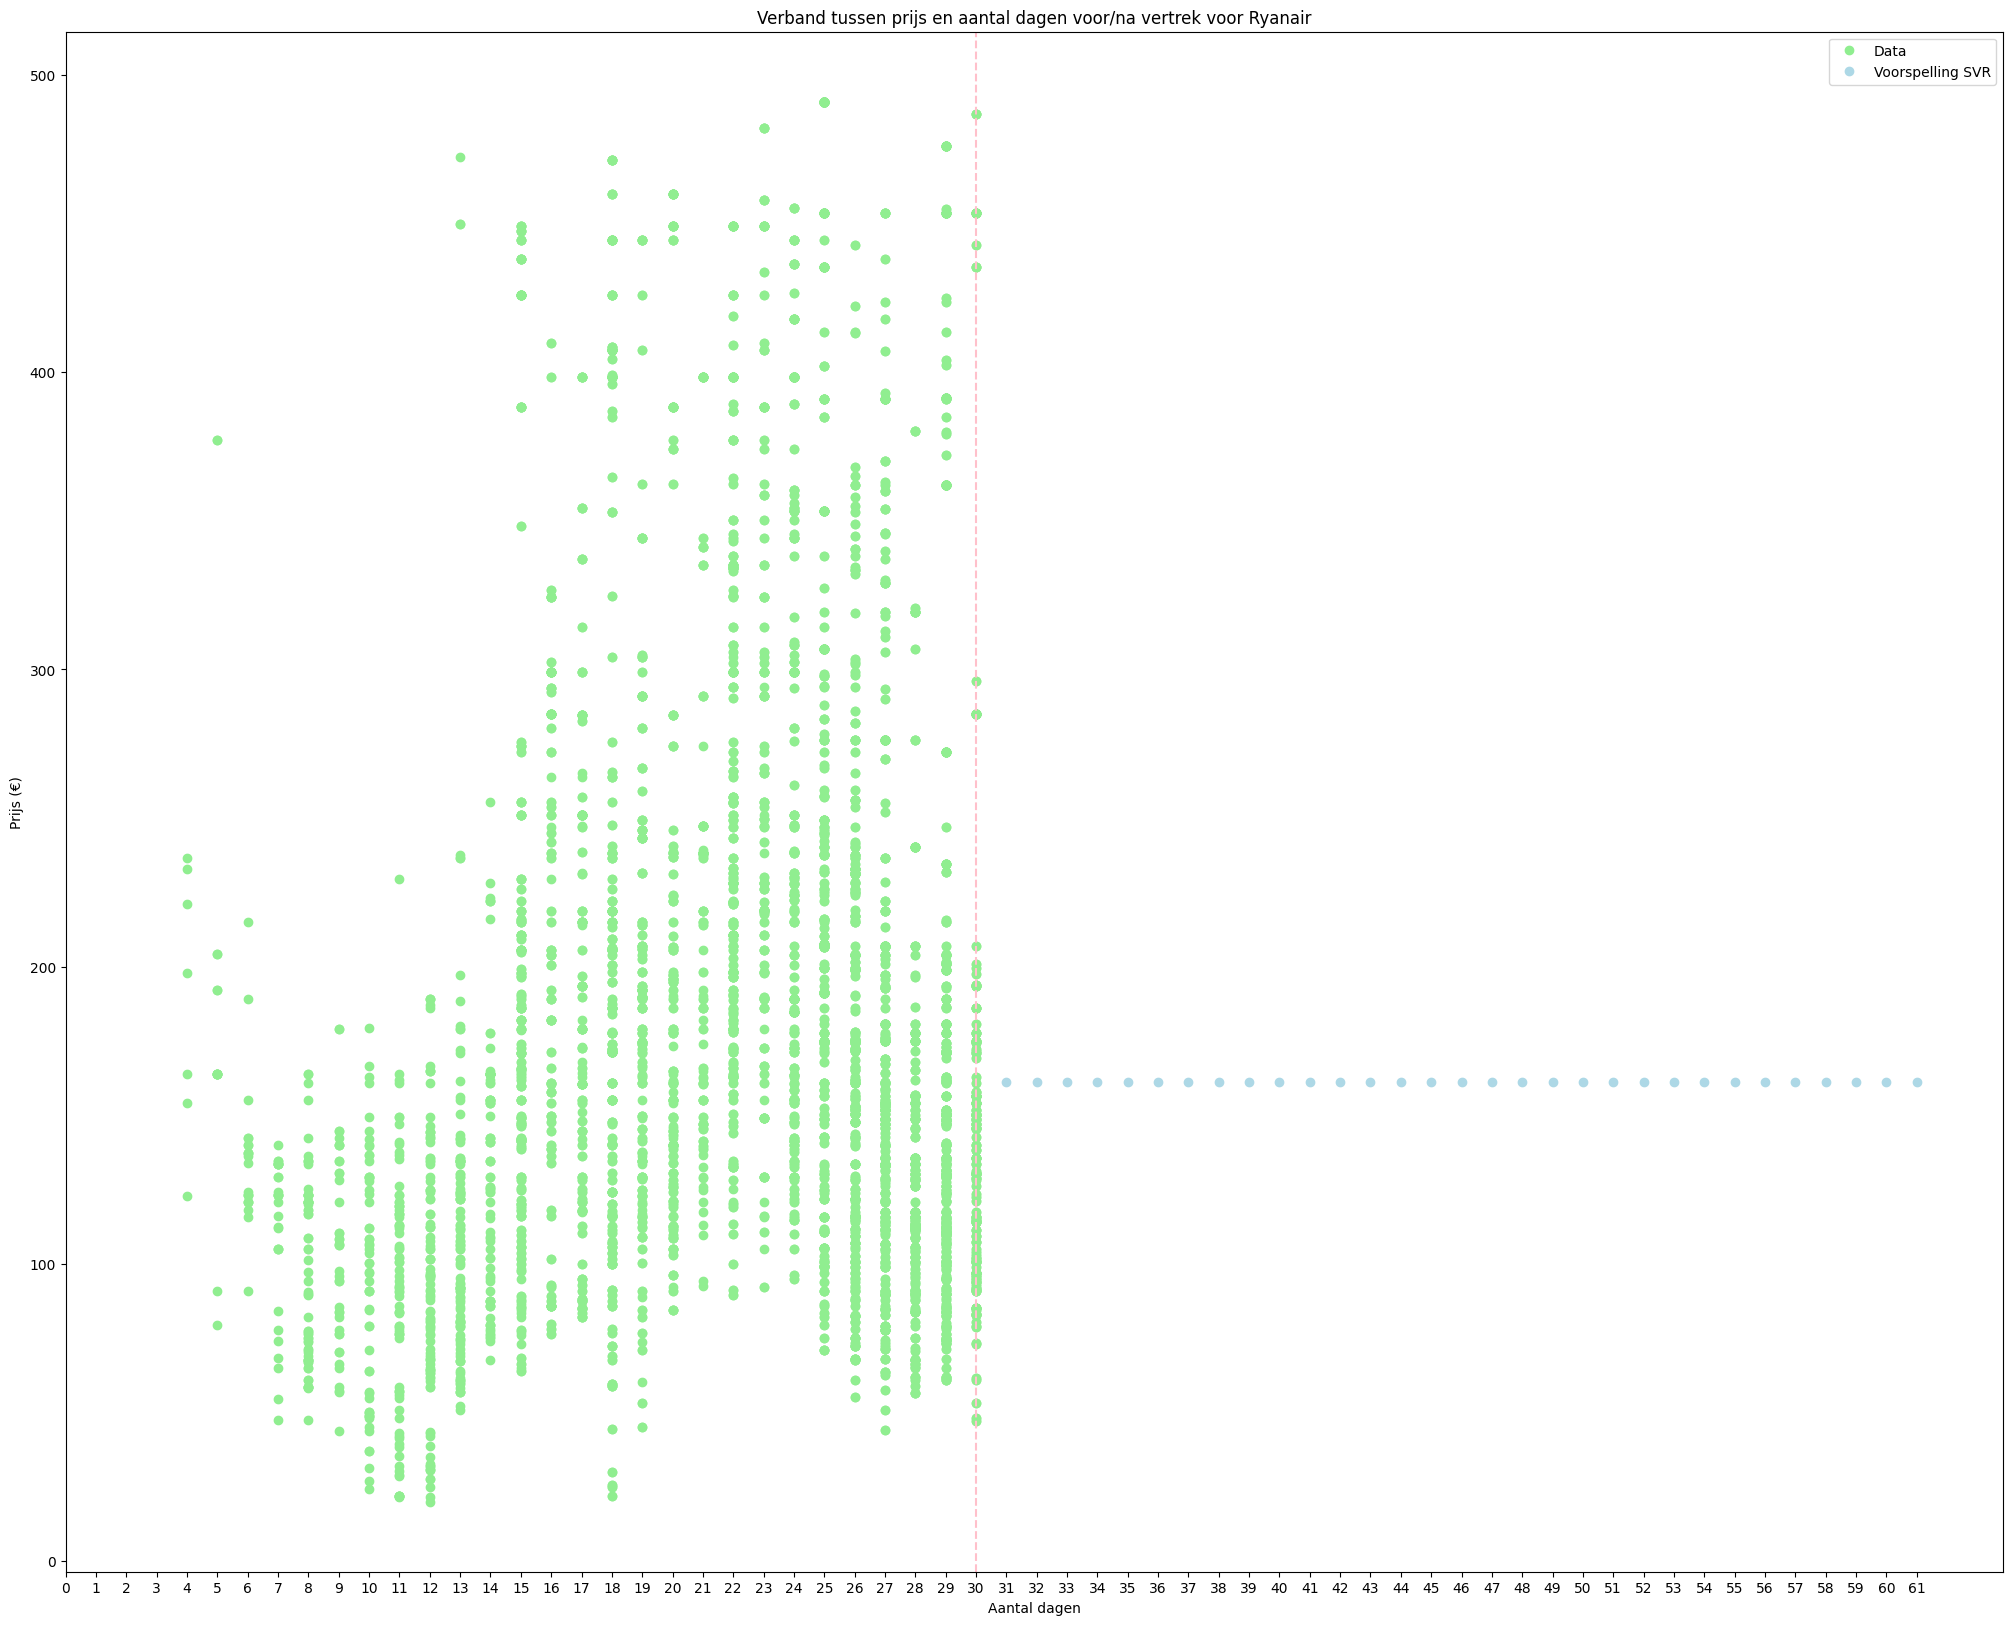

Accuracy score: 17.409742602541456 %
MSE: 8511.136088433761
Best parameters: {'max_depth': 3}
DecisionTreeRegressor(max_depth=3)
0.10572788417938117


In [18]:
# read data for Ryanair only
from sklearn.model_selection import GridSearchCV


data = df
data = data[data['airline_iata_code'] == 'FR']

# convert departure date to datetime object
data['departure_date'] = pd.to_datetime(data['departureDateKey'], format='%Y%m%d')

# get date range for last month
today = datetime.date.today()
tomorrow = today + datetime.timedelta(days=1)
last_month = today - pd.DateOffset(months=1)
date_range = pd.date_range(start=last_month, end=today, freq='D')

# filter data for last month
data = data[data['departure_date'].isin(date_range)]

# create grid search model for decision tree regressor
parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]}
dt = DecisionTreeRegressor()
clf = GridSearchCV(dt, parameters)

# fit the model
X_train = (data['departure_date'] - last_month).dt.days.values.reshape(-1, 1)
y_train = data['price'].values.reshape(-1, 1)
clf.fit(X_train, y_train)

# predict prices for next month
next_month = today + pd.DateOffset(months=1)
next_month_range = pd.date_range(start=tomorrow, end=next_month, freq='D')
X_test = (next_month_range - last_month).days.values.reshape(-1, 1)
y_pred_svr = clf.predict(X_test)

# plot results
plt.figure(figsize=(25, 20))
plt.plot(X_train, y_train, 'o', color='lightgreen')
plt.plot(X_test, y_pred_svr, 'o', color='lightblue')
plt.axvline(x=30, color='pink', linestyle='--')
plt.title('Verband tussen prijs en aantal dagen voor/na vertrek voor Ryanair')
plt.xticks(range(0, 62, 1))
plt.xlabel('Aantal dagen')
plt.ylabel('Prijs (€)')
plt.legend(['Data', 'Voorspelling SVR'])
plt.show()

# print the accuracy score and mse + best parameters
print(f"Accuracy score: {clf.score(X_train, y_train) * 100} %")
print(f"MSE: {mean_squared_error(y_train, clf.predict(X_train))}")
print(f"Best parameters: {clf.best_params_}")
print(clf.best_estimator_)
print(clf.best_score_)

De x-as van deze grafieken moet je interpreteren als volgt: 
- Van 0 tot en met 30 zijn de waarden voor de dagen voor vertrek (30 = 0 dagen voor vertrek, dus vandaag ; 0 = 30 dagen geleden)
- Van 31 tot en met 61 zijn de dagen van de komende maand (31 = morgen, 61 = volgende maand)

Samenvattend moet je kijken naar de verticale lijn, dit is het 'midden': alles ervoor zijn het aantal dagen voor vertrek, alles erna zijn de komende dagen (hoe dichter bij de lijn, hoe korter bij het heden; hie verder weg, hoe verder in het verleden of de toekomst)

### 15) In PowerBI een kaart maken met de mogelijke bestemmingen als de prijs in een bepaalde range moet liggen (op een bepaald moment).

In PowerBI

Is volledig opgelost, blad noemt "15"